### Connecttel Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns   

In [2]:
# Importing the data file

df = pd.read_csv ("Customer-Churn.csv")


### Accessing the Dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


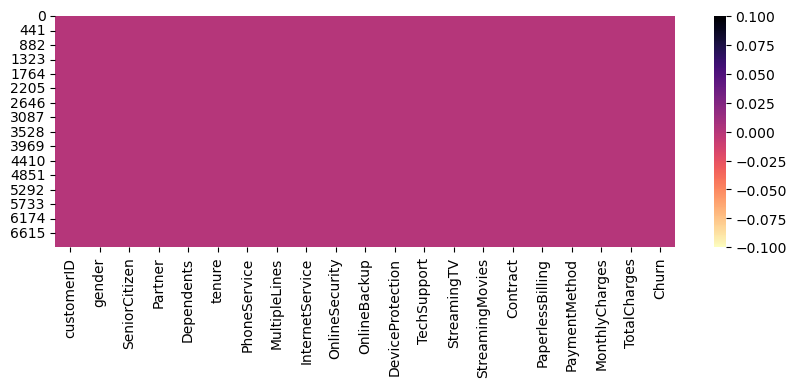

In [7]:
# checking for missing data
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar= True , cmap="magma_r");

In [8]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [10]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [13]:
df["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [15]:
def ml(MultipleLines):
    if MultipleLines == "Yes":
        return "Yes"
    else:
        return "No"
df['MultipleLines']=df['MultipleLines'].apply(ml)

In [16]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [17]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
def os(OnlineSecurity):
    if OnlineSecurity == "Yes":
        return "Yes"
    else:
        return "No"
df['OnlineSecurity']=df['OnlineSecurity'].apply(os)

In [19]:
df["OnlineSecurity"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [21]:
def ob(OnlineBackup):
    if OnlineBackup == "Yes":
        return "Yes"
    else:
        return "No"
df['OnlineBackup']=df['OnlineBackup'].apply(ob)

In [22]:
df["OnlineBackup"].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
def dp(DeviceProtection):
    if DeviceProtection == "Yes":
        return "Yes"
    else:
        return "No"
df['DeviceProtection']=df['DeviceProtection'].apply(dp)

In [25]:
df["DeviceProtection"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
def ts(TechSupport):
    if TechSupport == "Yes":
        return "Yes"
    else:
        return "No"
df['TechSupport']=df['TechSupport'].apply(ts)

In [28]:
df["TechSupport"].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
def st(StreamingTV):
    if StreamingTV == "Yes":
        return "Yes"
    else:
        return "No"
df['StreamingTV']=df['StreamingTV'].apply(st)

In [31]:
df["StreamingTV"].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [33]:
def sm(StreamingMovies):
    if StreamingMovies == "Yes":
        return "Yes"
    else:
        return "No"
df['StreamingMovies']=df['StreamingMovies'].apply(sm)

In [34]:
df["StreamingMovies"].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [36]:
df["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [38]:
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [39]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [40]:
df["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [41]:
df['TotalCharges'] = df['TotalCharges'].str.replace('[^\d.]', '', regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [42]:
df["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [43]:
df['TotalCharges'].isna().sum() 

11

In [44]:
df['TotalCharges'].mean()

2283.3004408418656

In [45]:
#df.dropna(inplace=True)

In [46]:
df['TotalCharges']= df['TotalCharges'].fillna(value=df['TotalCharges'].mean())

In [47]:
df['TotalCharges'].isna().sum() 

0

In [48]:
# Categorical statistical Analysis

df.describe(include = ["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


In [49]:
# Numerical Statistical Analysis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [50]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_28712\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


## Exploratory Data Analysis

###  Univariate Analysis

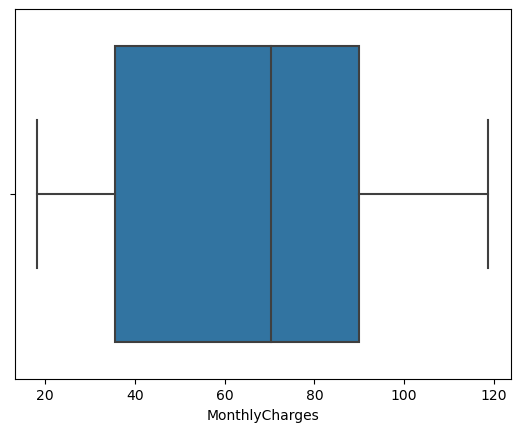

In [51]:
# Numerical 
sns.boxplot(x= df['MonthlyCharges']);

Minimum monthly charge is 20, average is around 70 while the maximum is about 120

In [52]:
df['MonthlyCharges'].sum() 

456116.6

In [53]:
df['TotalCharges'].sum() 

16081285.00484926

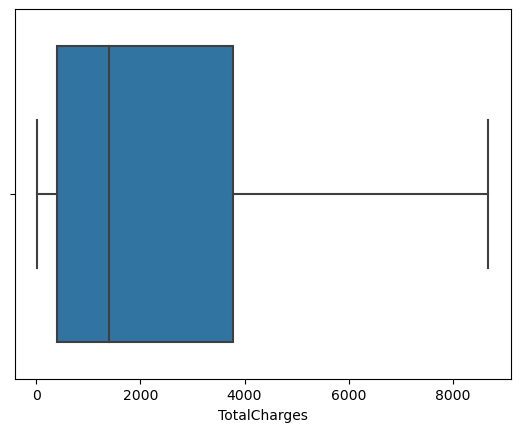

In [54]:
sns.boxplot(x= df['TotalCharges']);

Minimum Total charge of a customers 20 while the maximum is 9000

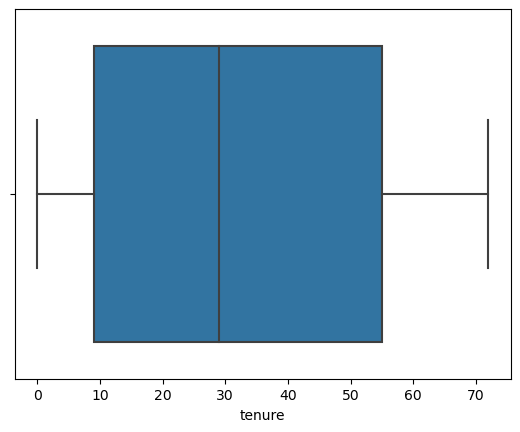

In [55]:
sns.boxplot(x= df['tenure']);

The highest duration duration of customer relationship is 70 months, mean of tenure duration is 29 there about and the least of tenure is 0

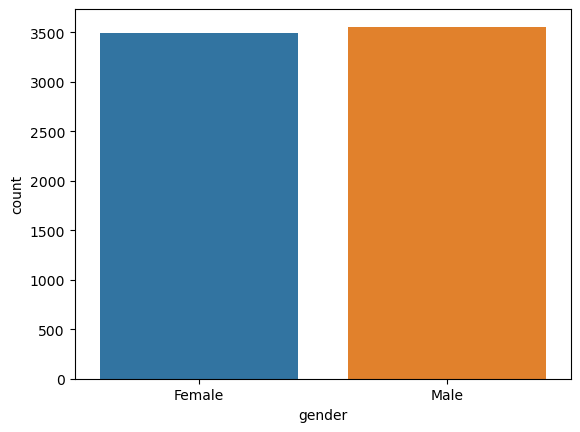

In [56]:
# categorical univariate analysis

# How many Customers belong to a specific gender

sns.countplot(x="gender", data =df);

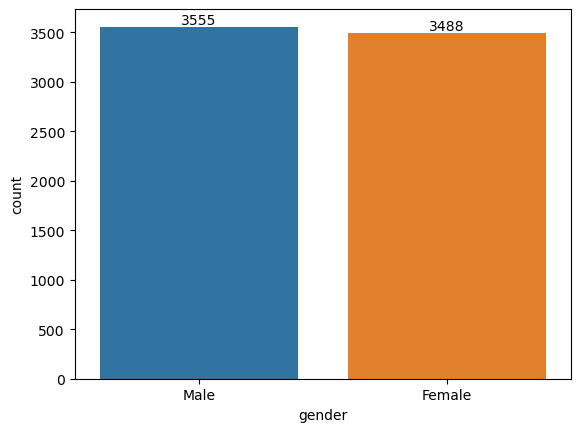

In [57]:
ax= sns.countplot(x=df["gender"], order=df["gender"].value_counts(ascending=False).index)
values= df["gender"].value_counts(ascending= False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [58]:
from collections import Counter

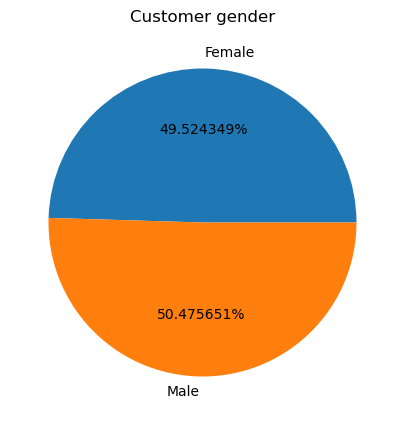

In [59]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer gender")
plt.show();

####  Narration
 - There is no much disparity between the number of female and male gender 49.5% and 50.5% respectively

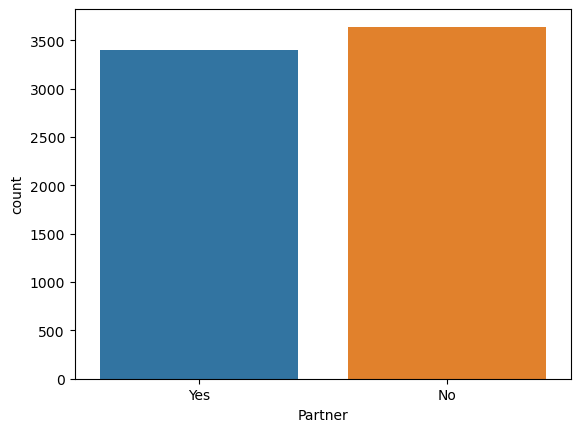

In [60]:
sns.countplot(x="Partner", data =df);

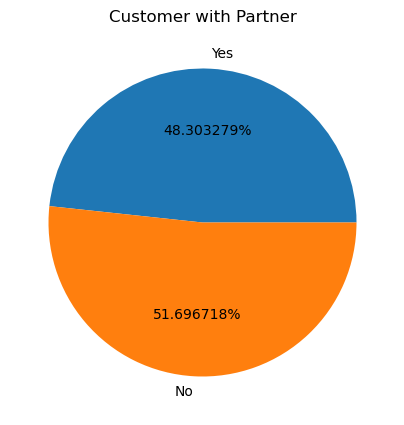

In [61]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["Partner"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer with Partner")
plt.show()

### Narration
percentage of customers with partner (48.3%) with the company is a bit lower with those that has no partner(51.7%)

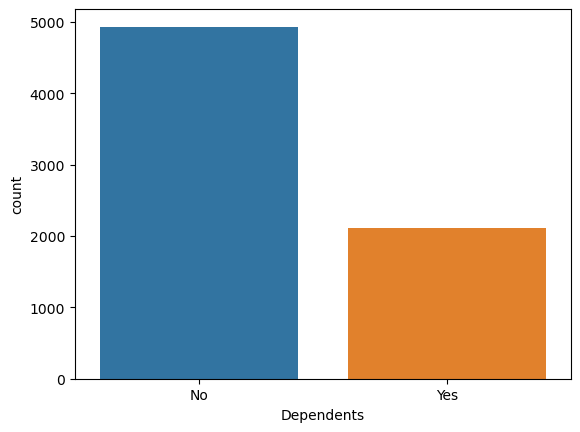

In [62]:
sns.countplot(x="Dependents", data =df);

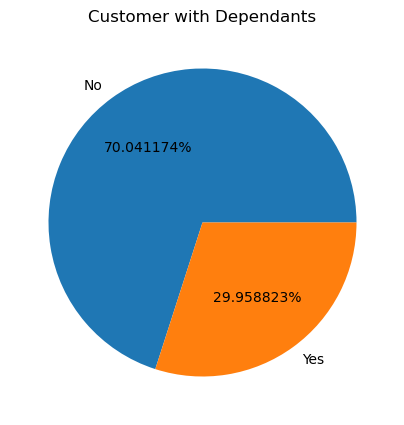

In [63]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["Dependents"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer with Dependants")
plt.show()

### Narration
percentage of customers with dependants(29.9%) with the company is a greatly lower with those that has no dependants (70.1%)

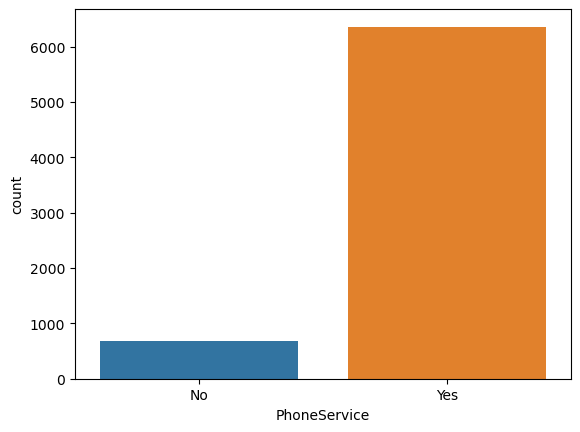

In [64]:
sns.countplot(x="PhoneService", data =df);

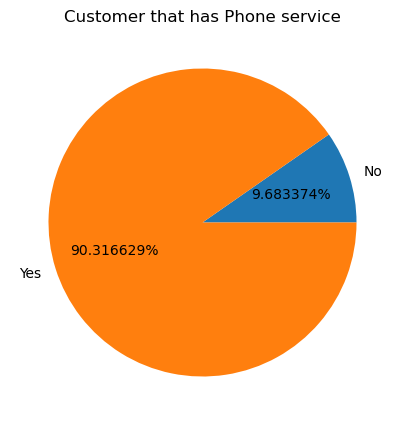

In [65]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["PhoneService"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer that has Phone service")
plt.show()

### Narration
percentage of customers that has phone service(90.3%) with the company is a greatly higher with those that has no phone service (9.7%)

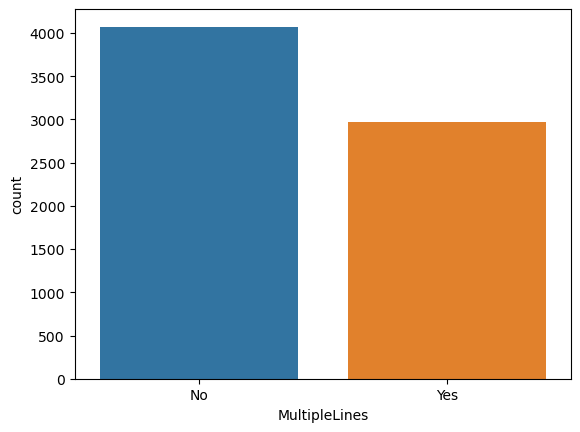

In [66]:
sns.countplot(x="MultipleLines", data =df);

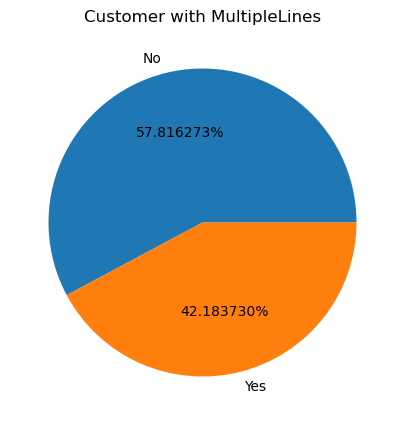

In [67]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["MultipleLines"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer with MultipleLines")
plt.show()

### Narration
Percentage of customers that has Multiple Lines(42.1%)  is slightly lower with those that has no Multiple Lines (57.8%)

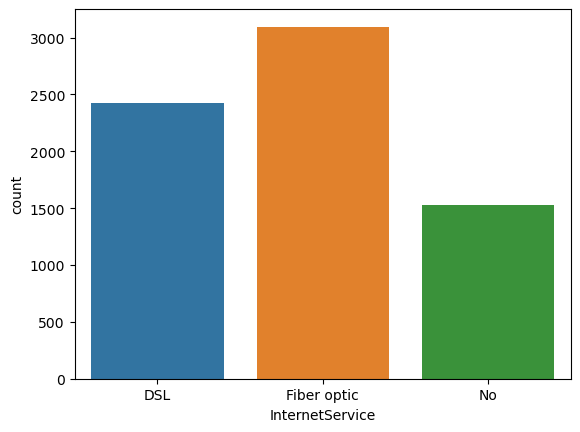

In [68]:
sns.countplot(x="InternetService", data =df);

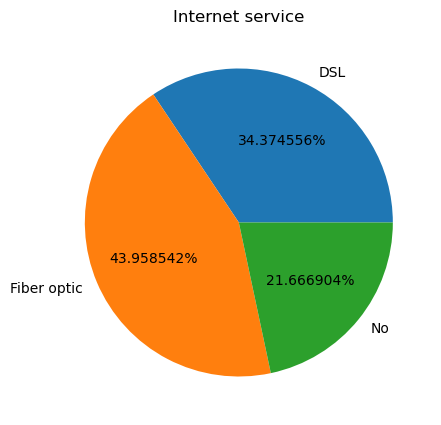

In [69]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["InternetService"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Internet service")
plt.show()

### Narration
Percentage of customers that has Internet service using Fibre optic is (43.9%), followed by DSL(34.4%) with No internet service been the least(21.7%)

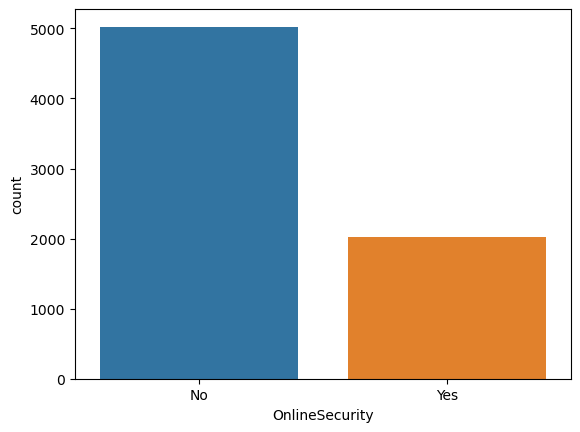

In [70]:
sns.countplot(x="OnlineSecurity", data =df);

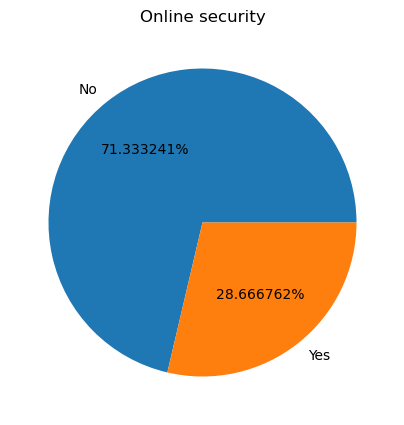

In [71]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["OnlineSecurity"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Online security")
plt.show()

### Narration
Percentage of customers that has Online Security(28.7%) is lower than those that has no Online Secrity (71.3%)

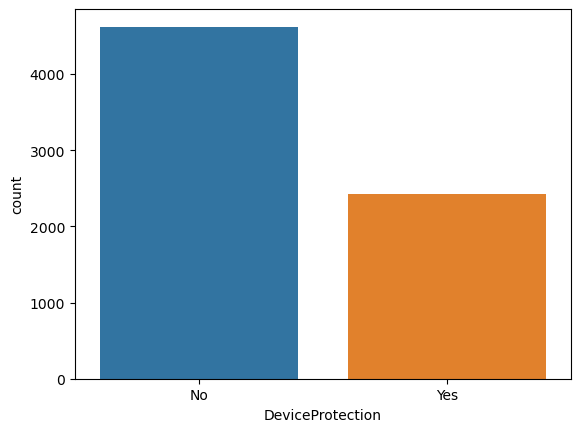

In [72]:
sns.countplot(x="DeviceProtection", data =df);

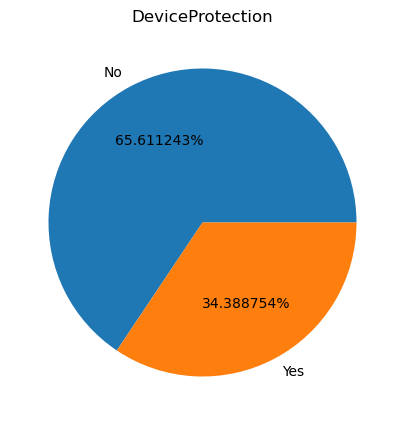

In [73]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["DeviceProtection"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("DeviceProtection")
plt.show()

### Narration
Percentage of customers that has Device Protection(34.4%)  is lower thanthose that has no Device Protection (65.6%)

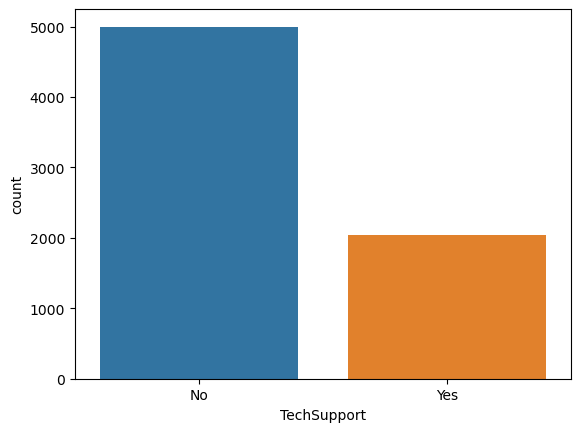

In [74]:
sns.countplot(x="TechSupport", data =df);

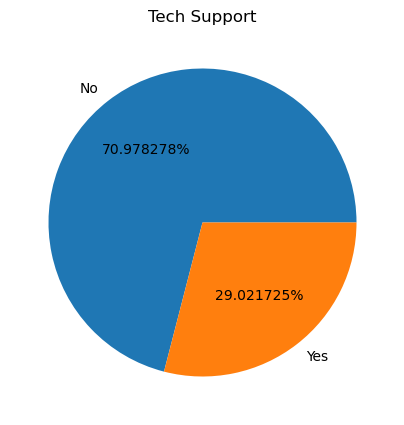

In [75]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["TechSupport"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Tech Support")
plt.show()

with Tech support  29%, without tech support (71%)

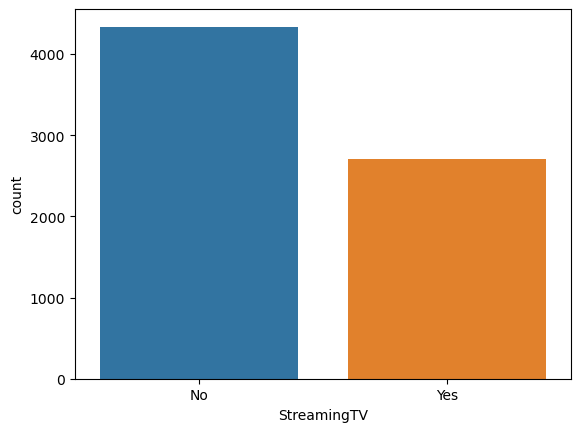

In [76]:
sns.countplot(x="StreamingTV", data =df);

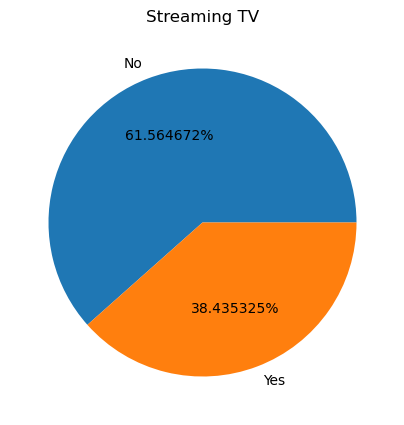

In [77]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["StreamingTV"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Streaming TV")
plt.show()

### Narration
Percentage of customers that has streaming TV service activated(38.4%)  is lower than those that doen't (61.6%)

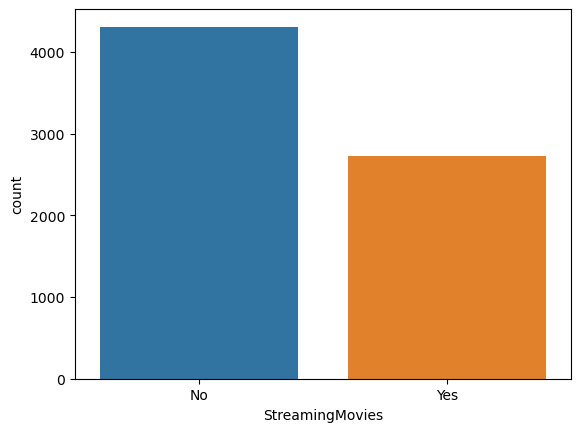

In [78]:
sns.countplot(x="StreamingMovies", data =df);

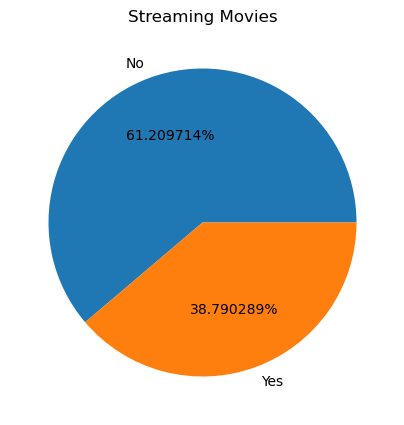

In [79]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["StreamingMovies"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Streaming Movies")
plt.show()

### Narration
Percentage of customers that has streaming movies service activated is(38.8%)  while those that do no have(61.2%)

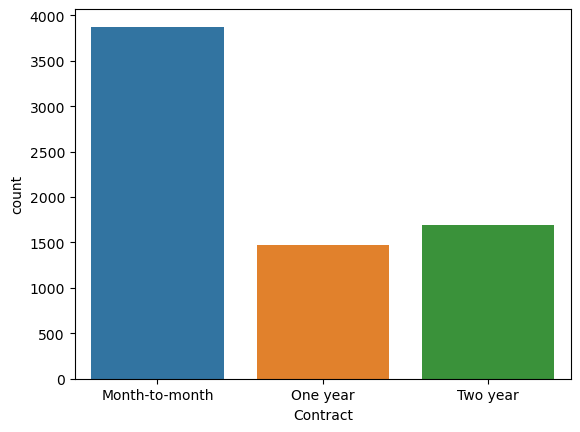

In [80]:
sns.countplot(x="Contract", data =df);

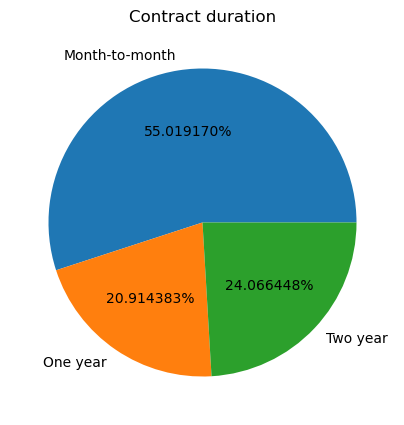

In [81]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["Contract"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Contract duration")
plt.show()

### Narration
Customer contract duration is more of Month-to-month (55%) followed by two year(24%)and the least one year (21%)

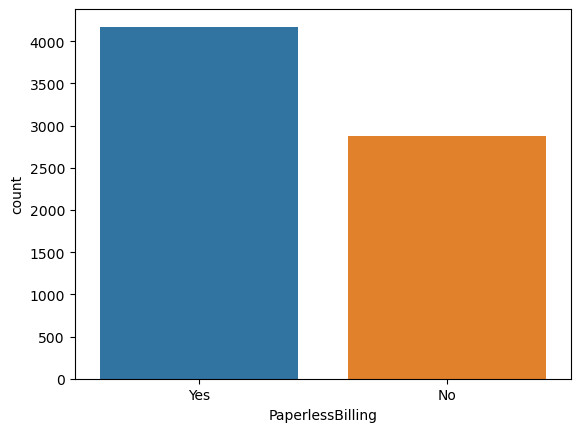

In [82]:
sns.countplot(x="PaperlessBilling", data =df);

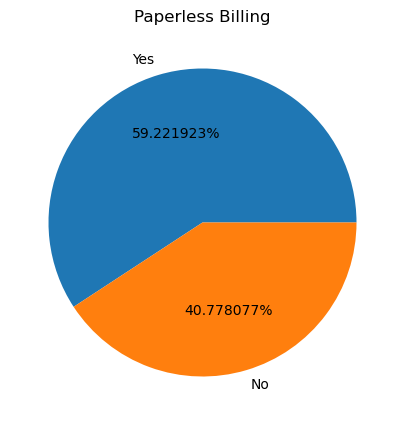

In [83]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["PaperlessBilling"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Paperless Billing")
plt.show()

### Narration
Percentage of customers that do Paperless billing(59.2%) while those that doesn't (40.8%)

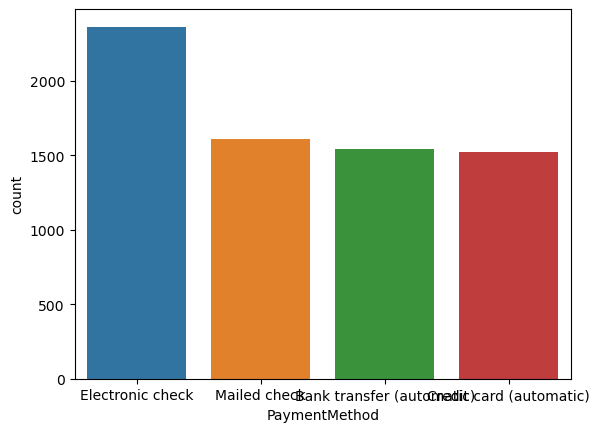

In [84]:
sns.countplot(x="PaymentMethod", data =df);

The count of customers using Electronic check as a payment method is more than other payment method, folowed by Mailed checked, Bank transfer (automatic), card (automatic) respectively 

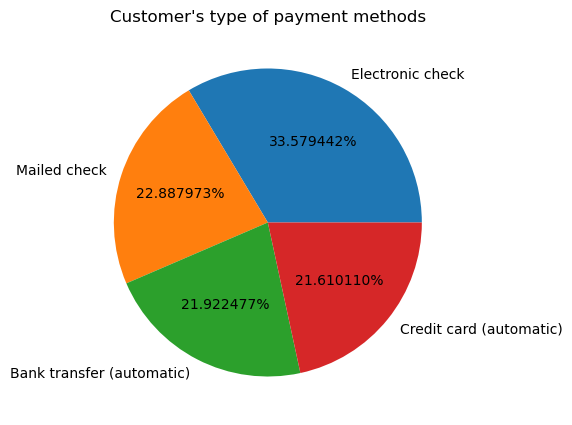

In [85]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["PaymentMethod"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Customer's type of payment methods")
plt.show()

### Narration
Type of payment Method
- Electronic check(33.6%), Mail check(22.9%)
- Bank Transfer(automatic) is 21.9% while Credit Card (automation) is 21.6%

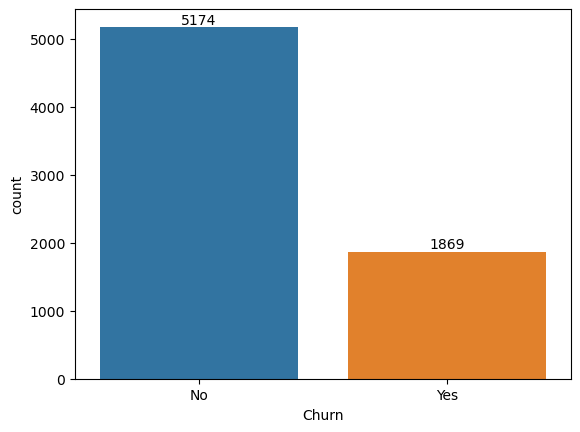

In [86]:
ax= sns.countplot(x=df["Churn"], order=df["Churn"].value_counts(ascending=False).index)
values= df["Churn"].value_counts(ascending= False).values
ax.bar_label(container=ax.containers[0], labels=values);

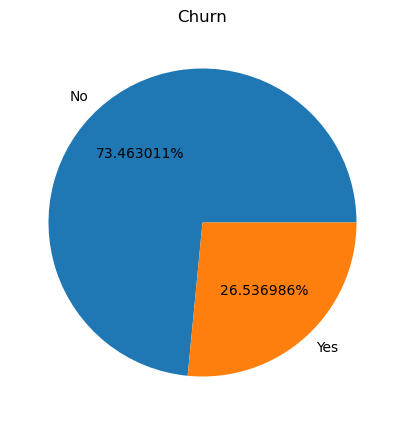

In [87]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["Churn"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("Churn")
plt.show()

The Percentage of Customer who has left the company or stop using the network service is (26.5%) while those who are still using the company service is (73.5%)

In [88]:
def sen_citzn(x):
    if x == 0:
        return "No"
    else:
        return "Yes"
df["SeniorCitizen"] = df['SeniorCitizen'].apply(sen_citzn)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


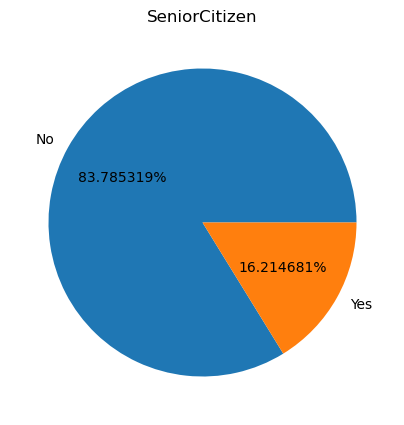

In [89]:
fig,ax= plt.subplots(figsize=(5,5))
count= Counter(df["SeniorCitizen"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%')
ax.set_title("SeniorCitizen")
plt.show()

Customers who fall in senoir citizen category is (16.2%) while those who are not senior citizen are (83.8%)

In [90]:
 # Group tenure duration
x = df["tenure"]
def tenure_group(x):
    if x <= 10:
        return "0 - 10"
    elif x <= 21:
        return "11 - 21"
    elif x <= 31:
        return "22 - 31"
    elif x <= 41:
        return "32 - 41"
    elif x <= 51:
        return "42 - 51"
    elif x <= 61:
        return "52 - 61"
    else:
        return "62 - 75"
    
# Apply function to the data
df["tenure_duration"]= x.apply(tenure_group)

df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0 - 10
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,32 - 41
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0 - 10


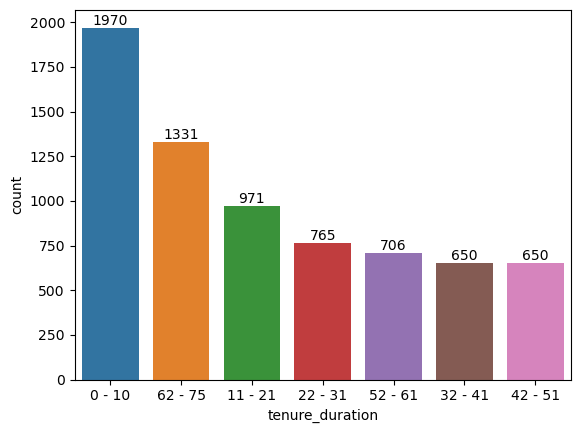

In [91]:
ax= sns.countplot(x=df["tenure_duration"], order=df["tenure_duration"].value_counts(ascending=False).index)
values= df["tenure_duration"].value_counts(ascending= False).values
ax.bar_label(container=ax.containers[0], labels=values);

Count of the tenure duration 0 to 10 is is the highest

### Bivariate Analysis

Text(0.5, 1.0, 'Monthly charges per Customer with multiple lines')

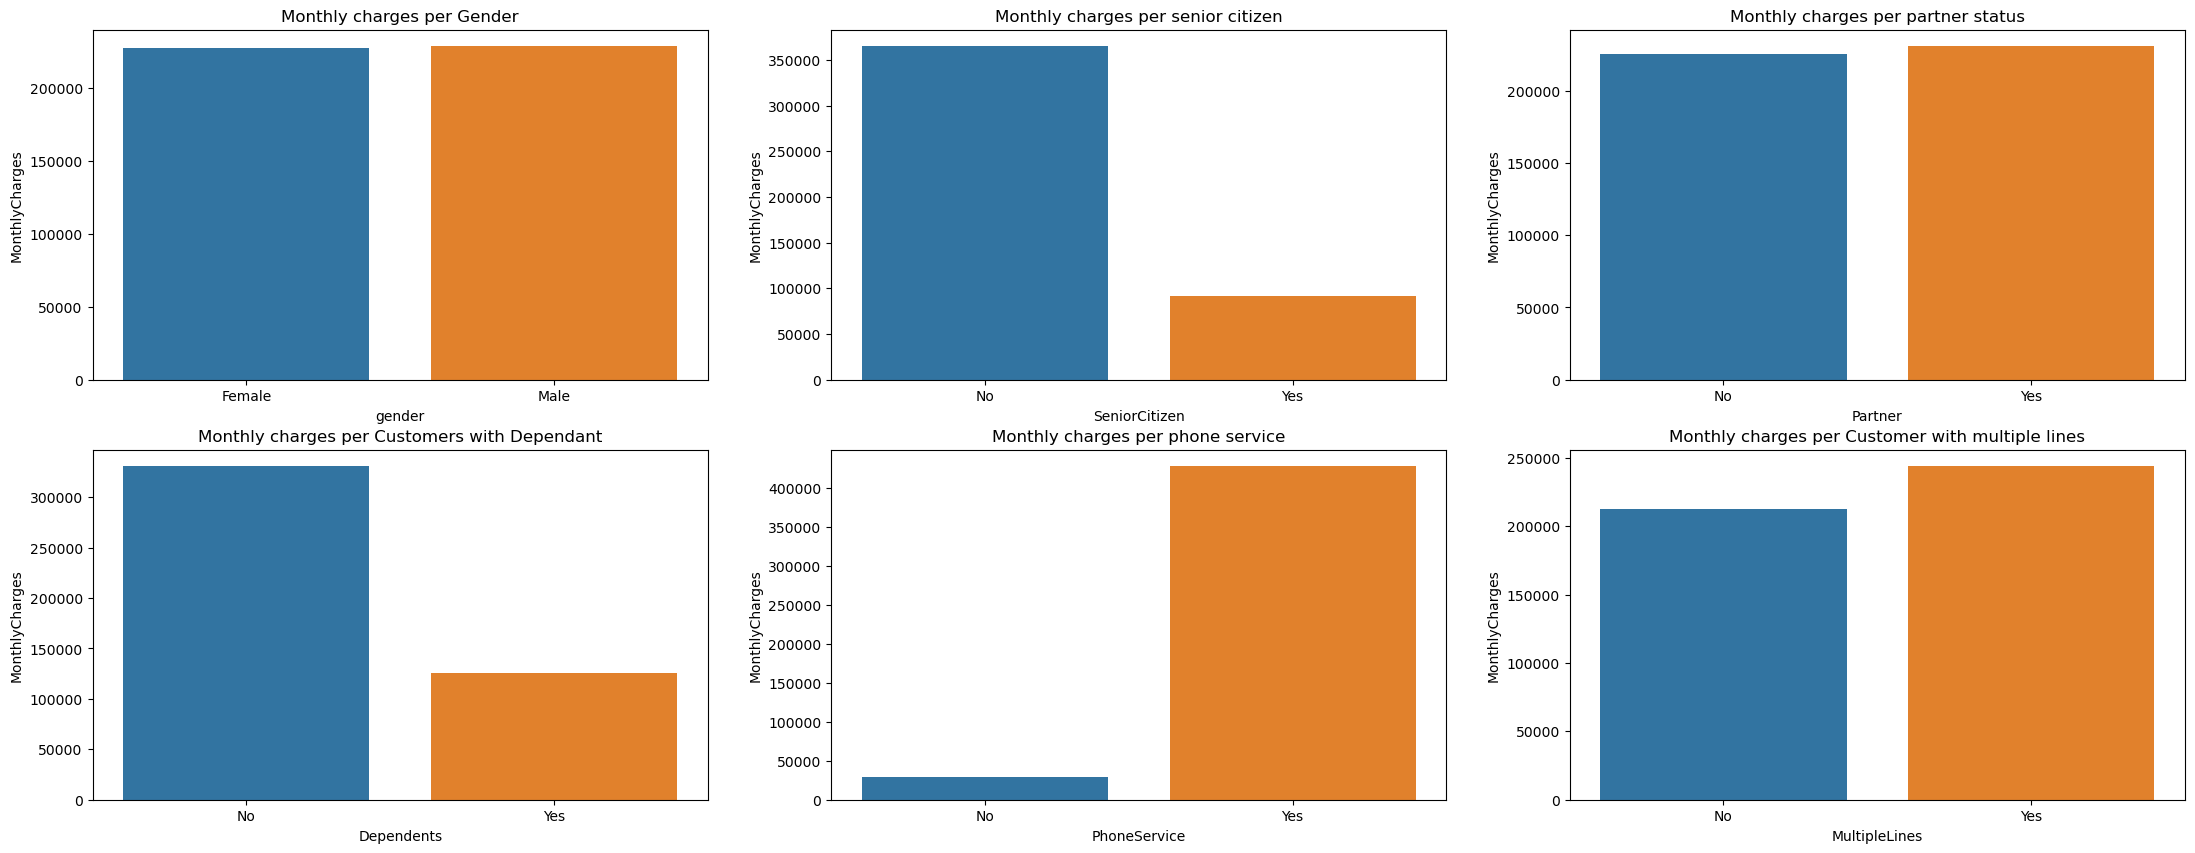

In [92]:
# Categorical Columns

fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

gen_mon = df.groupby("gender")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='gender', data= gen_mon, y= 'MonthlyCharges', ax=axs[0,0])
axs[0,0].set_title("Monthly charges per Gender")

sen_mon = df.groupby("SeniorCitizen")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='SeniorCitizen', data= sen_mon, y= 'MonthlyCharges', ax=axs[0,1])
axs[0,1].set_title("Monthly charges per senior citizen")

part_mon = df.groupby("Partner")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='Partner', data= part_mon, y= 'MonthlyCharges', ax=axs[0,2])
axs[0,2].set_title("Monthly charges per partner status")

dep_mon = df.groupby("Dependents")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='Dependents', data= dep_mon, y= 'MonthlyCharges', ax=axs[1,0])
axs[1,0].set_title("Monthly charges per Customers with Dependant")


phon_mon = df.groupby("PhoneService")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='PhoneService', data=phon_mon , y= 'MonthlyCharges', ax=axs[1,1])
axs[1,1].set_title("Monthly charges per phone service")


mult_mon = df.groupby("MultipleLines")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='MultipleLines', data= mult_mon, y= 'MonthlyCharges', ax=axs[1,2])
axs[1,2].set_title("Monthly charges per Customer with multiple lines")


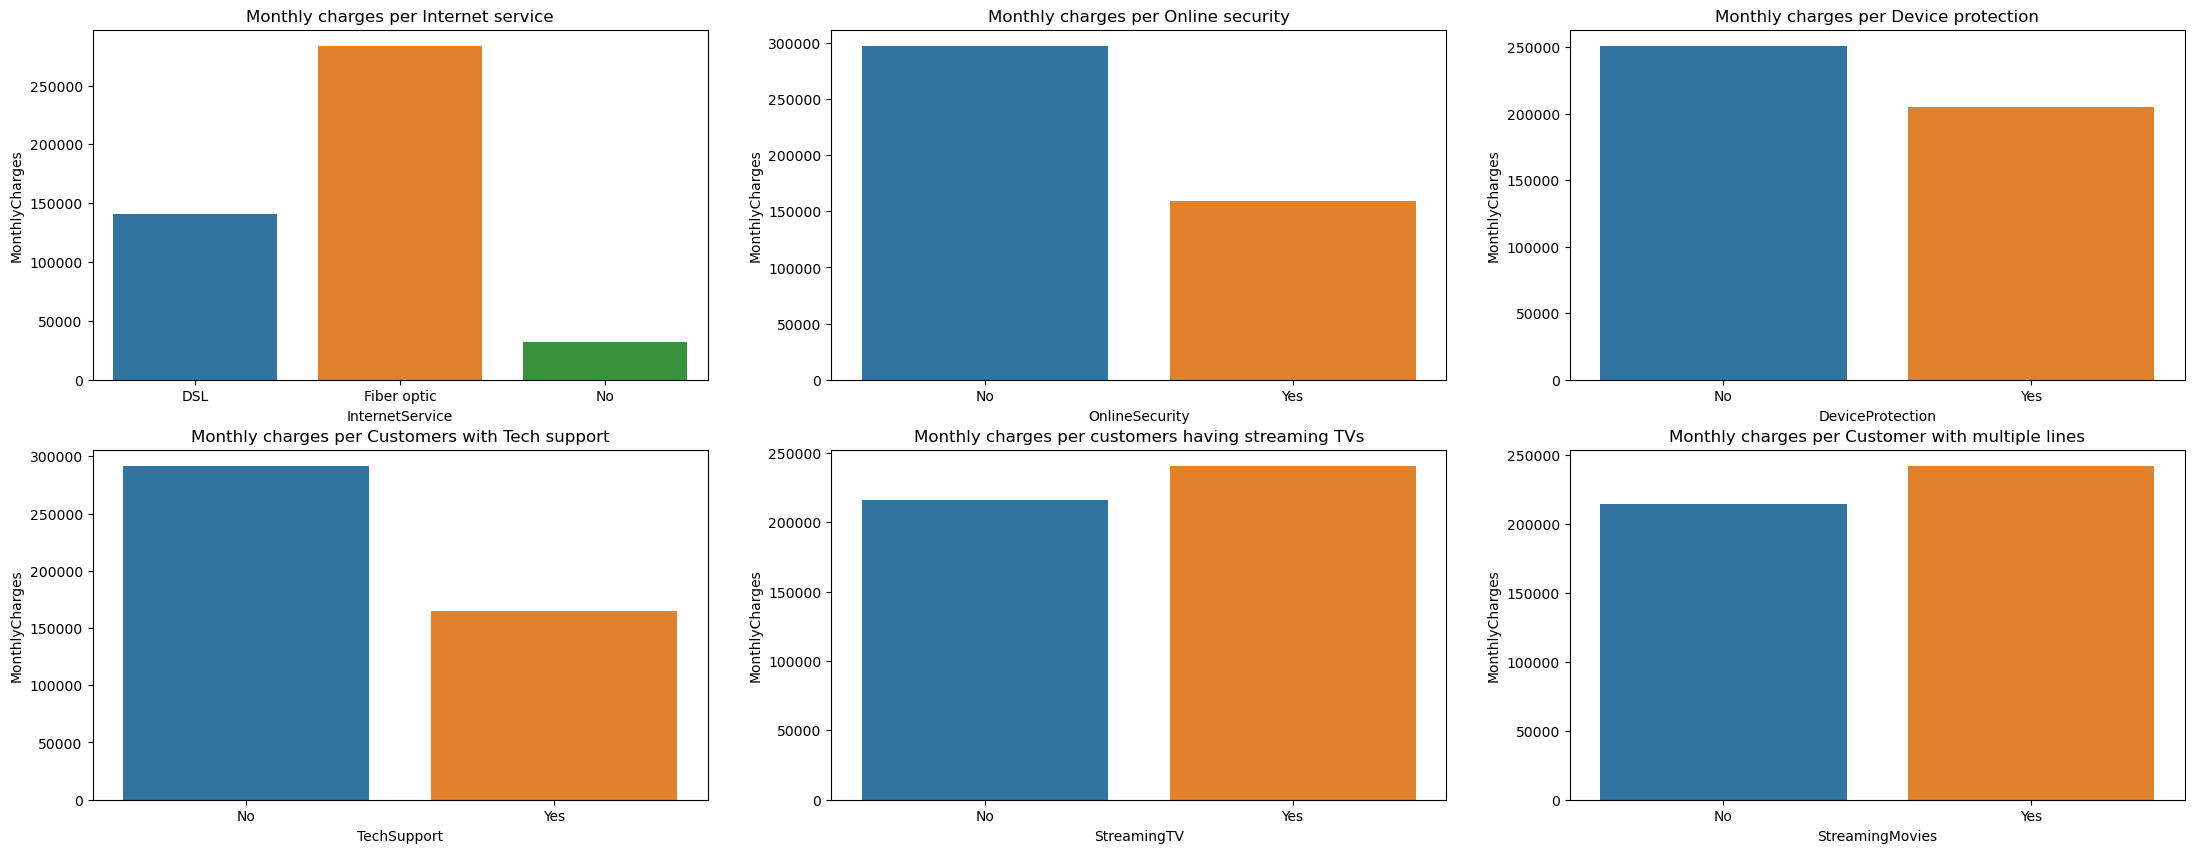

In [93]:
fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

int_mon = df.groupby("InternetService")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='InternetService', data= int_mon, y= 'MonthlyCharges', ax=axs[0,0])
axs[0,0].set_title("Monthly charges per Internet service")

on_mon = df.groupby("OnlineSecurity")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='OnlineSecurity', data= on_mon, y= 'MonthlyCharges', ax=axs[0,1])
axs[0,1].set_title("Monthly charges per Online security")

dev_mon = df.groupby("DeviceProtection")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='DeviceProtection', data= dev_mon, y= 'MonthlyCharges', ax=axs[0,2])
axs[0,2].set_title("Monthly charges per Device protection")

tech_mon = df.groupby("TechSupport")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='TechSupport', data= tech_mon, y= 'MonthlyCharges', ax=axs[1,0])
axs[1,0].set_title("Monthly charges per Customers with Tech support")


st_mon = df.groupby("StreamingTV")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='StreamingTV', data=st_mon , y= 'MonthlyCharges', ax=axs[1,1])
axs[1,1].set_title("Monthly charges per customers having streaming TVs")


sm_mon = df.groupby("StreamingMovies")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='StreamingMovies', data= sm_mon, y= 'MonthlyCharges', ax=axs[1,2])
axs[1,2].set_title("Monthly charges per Customer with multiple lines");

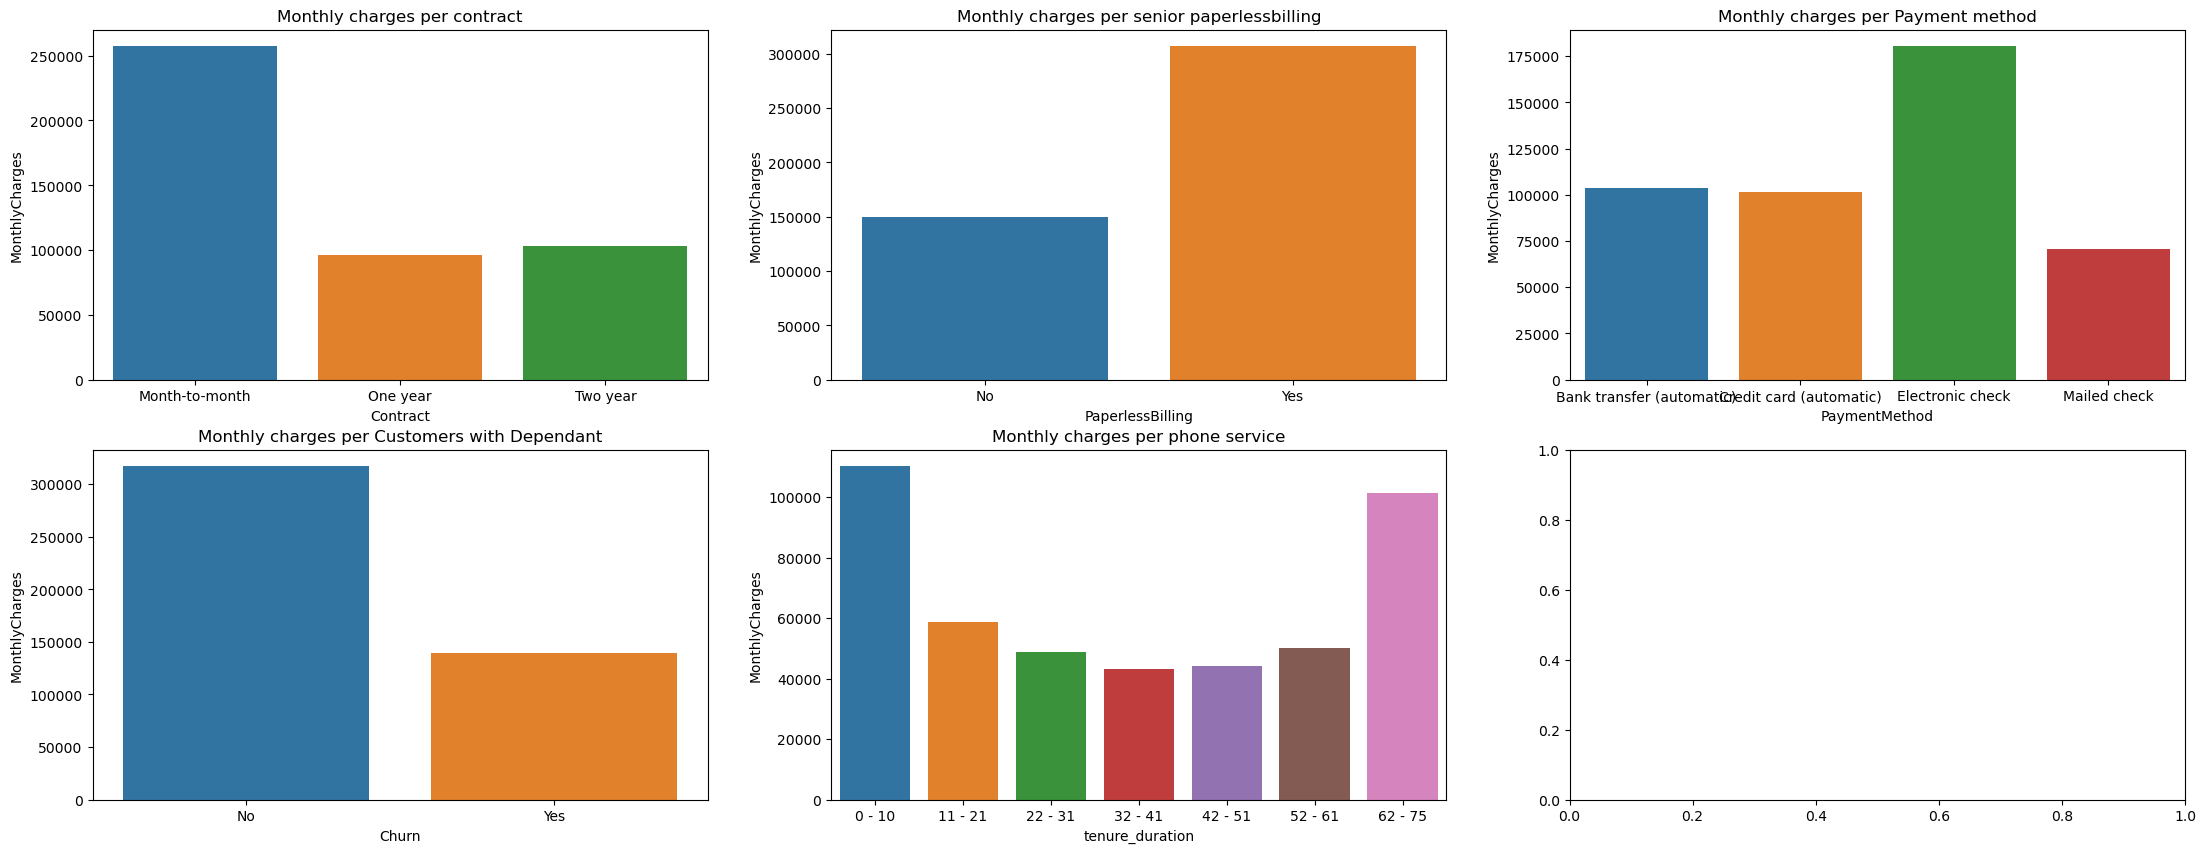

In [94]:
fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

con_mon = df.groupby("Contract")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='Contract', data= con_mon, y= 'MonthlyCharges', ax=axs[0,0])
axs[0,0].set_title("Monthly charges per contract")

pap_mon = df.groupby("PaperlessBilling")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='PaperlessBilling', data= pap_mon, y= 'MonthlyCharges', ax=axs[0,1])
axs[0,1].set_title("Monthly charges per senior paperlessbilling")

pay_mon = df.groupby("PaymentMethod")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='PaymentMethod', data= pay_mon, y= 'MonthlyCharges', ax=axs[0,2])
axs[0,2].set_title("Monthly charges per Payment method")

churn_mon = df.groupby("Churn")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='Churn', data= churn_mon, y= 'MonthlyCharges', ax=axs[1,0])
axs[1,0].set_title("Monthly charges per Customers with Dependant")


ten_mon = df.groupby("tenure_duration")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='tenure_duration', data=ten_mon , y= 'MonthlyCharges', ax=axs[1,1])
axs[1,1].set_title("Monthly charges per phone service");

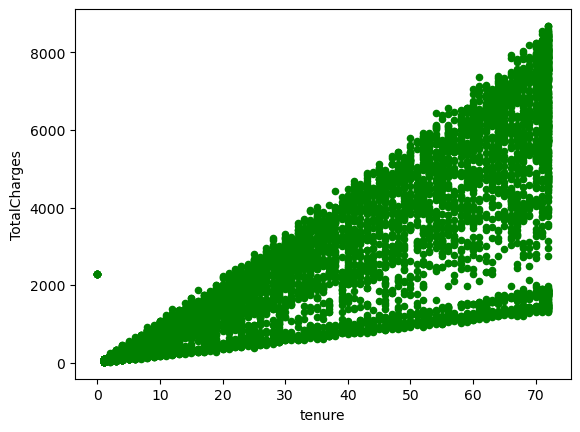

In [161]:
df.plot(kind='scatter',x='tenure', y='TotalCharges', c=['Green'])
plt.show()

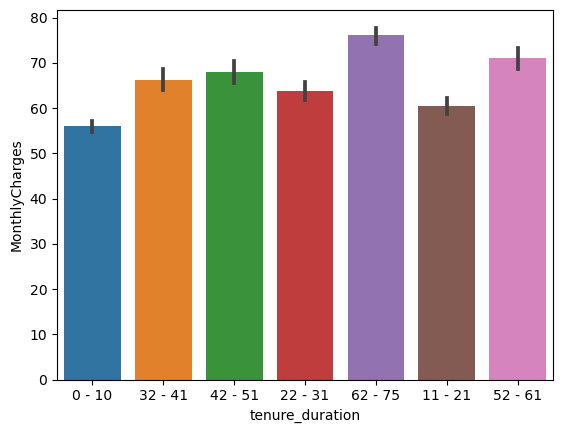

In [95]:
 sns.barplot (x='tenure_duration', data= df, y= 'MonthlyCharges');

Even though the count of customer with tenure duration 0 to 10 is the highest, 62 to 75 tends to generated highest monthly revenue  followed by 52 to 61 
- In sum; the higher the tenure duration the higher the monthly revenue generated

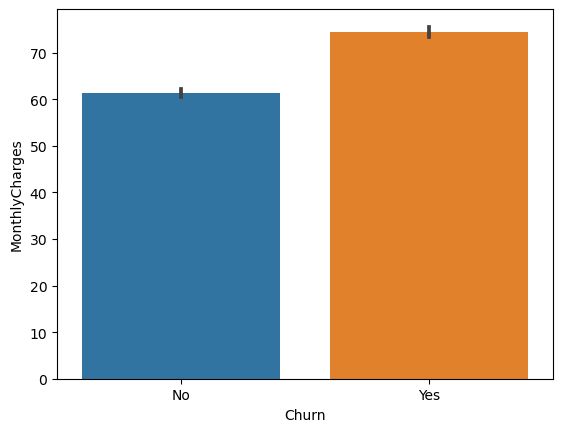

In [96]:
sns.barplot (x='Churn', data= df, y= 'MonthlyCharges');

Customers who genenrated highest monthly revenue has churn

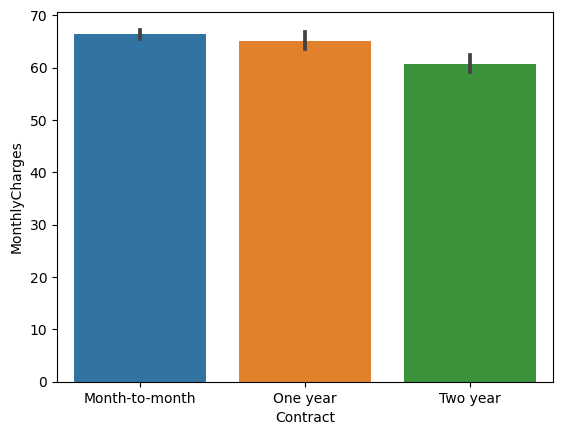

In [97]:
sns.barplot (x='Contract', data= df, y= 'MonthlyCharges');

Highest monthly revenue was generated from customer who signed month-to-month contract followed by one year contract with the least two year contract 

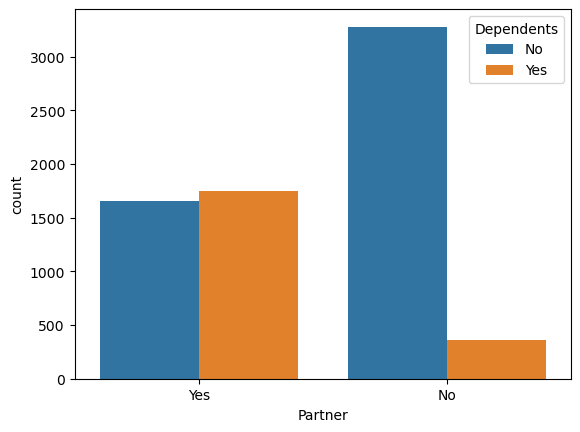

In [98]:
sns.countplot(x="Partner", data =df, hue = 'Dependents');

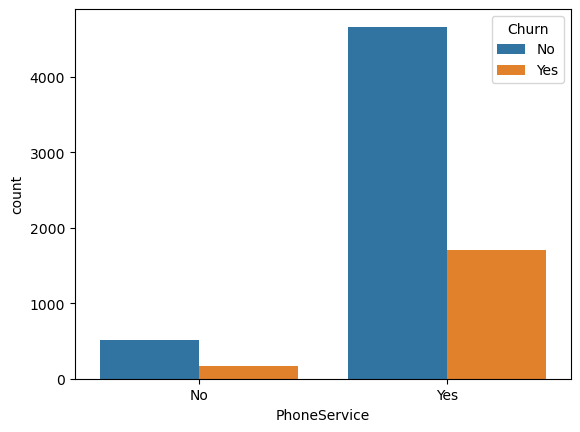

In [99]:
sns.countplot(x="PhoneService", data =df, hue = 'Churn');

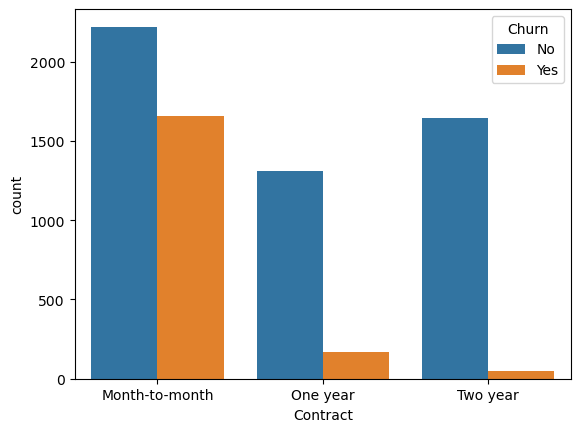

In [100]:
sns.countplot(x="Contract", data =df, hue = 'Churn');

Customer churn reduces with lenght contract duration signed 

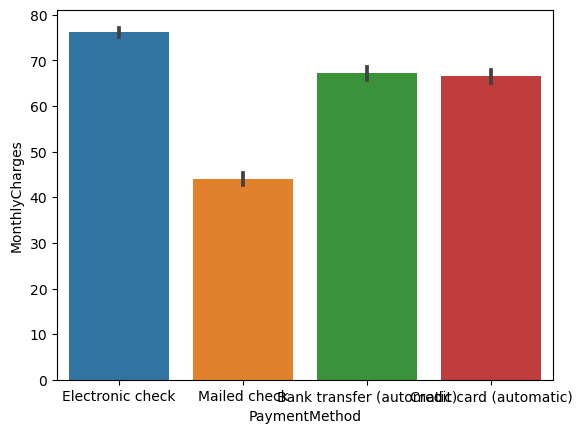

In [101]:
sns.barplot (x='PaymentMethod', data= df, y= 'MonthlyCharges');

Customer using Electronic check generated highest revenue followed by Bank transfer, card and mail check being the least

Text(0.5, 1.0, 'Total Charges per Customer with multiple lines')

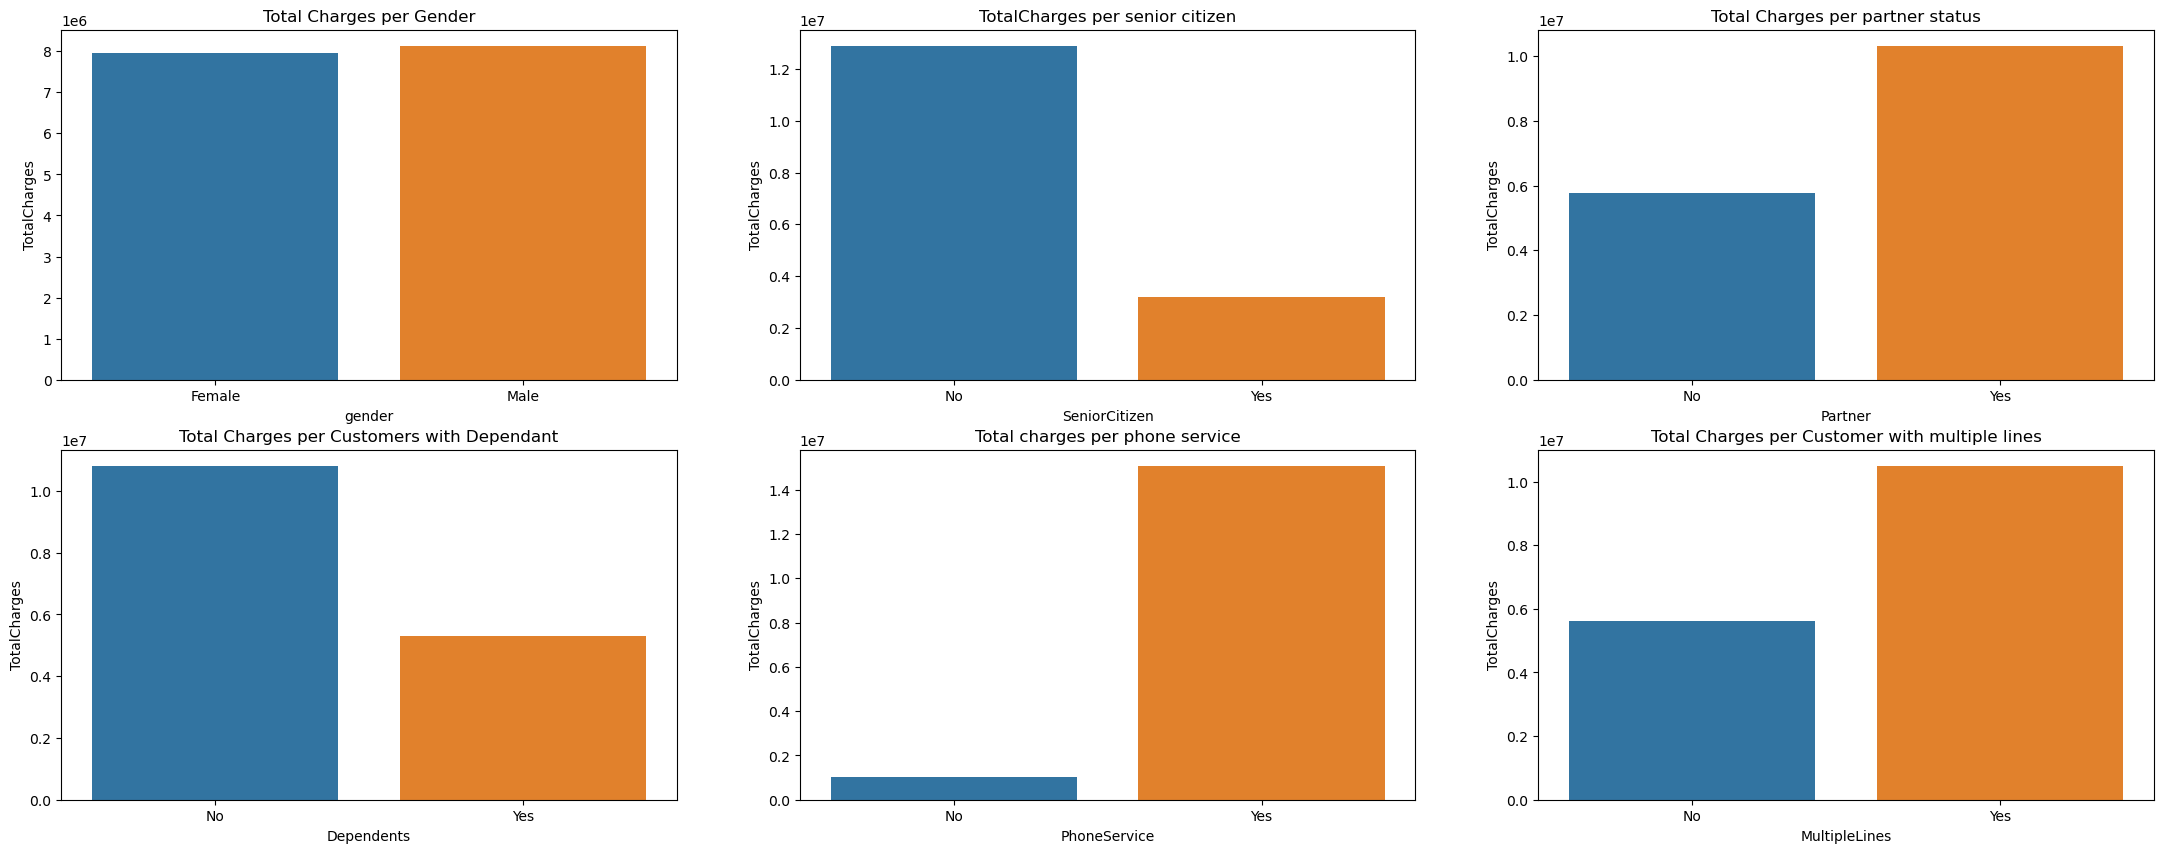

In [102]:
# categorical column per total charges

fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

gen_mon = df.groupby("gender")["TotalCharges"].sum().reset_index()
sns.barplot(x='gender', data= gen_mon, y= 'TotalCharges', ax=axs[0,0])
axs[0,0].set_title("Total Charges per Gender")

sen_mon = df.groupby("SeniorCitizen")["TotalCharges"].sum().reset_index()
sns.barplot(x='SeniorCitizen', data= sen_mon, y= 'TotalCharges', ax=axs[0,1])
axs[0,1].set_title("TotalCharges per senior citizen")

part_mon = df.groupby("Partner")["TotalCharges"].sum().reset_index()
sns.barplot(x='Partner', data= part_mon, y= 'TotalCharges', ax=axs[0,2])
axs[0,2].set_title("Total Charges per partner status")

dep_mon = df.groupby("Dependents")["TotalCharges"].sum().reset_index()
sns.barplot(x='Dependents', data= dep_mon, y= 'TotalCharges', ax=axs[1,0])
axs[1,0].set_title("Total Charges per Customers with Dependant")


phon_mon = df.groupby("PhoneService")["TotalCharges"].sum().reset_index()
sns.barplot(x='PhoneService', data=phon_mon , y= 'TotalCharges', ax=axs[1,1])
axs[1,1].set_title("Total charges per phone service")


mult_mon = df.groupby("MultipleLines")["TotalCharges"].sum().reset_index()
sns.barplot(x='MultipleLines', data= mult_mon, y= 'TotalCharges', ax=axs[1,2])
axs[1,2].set_title("Total Charges per Customer with multiple lines")


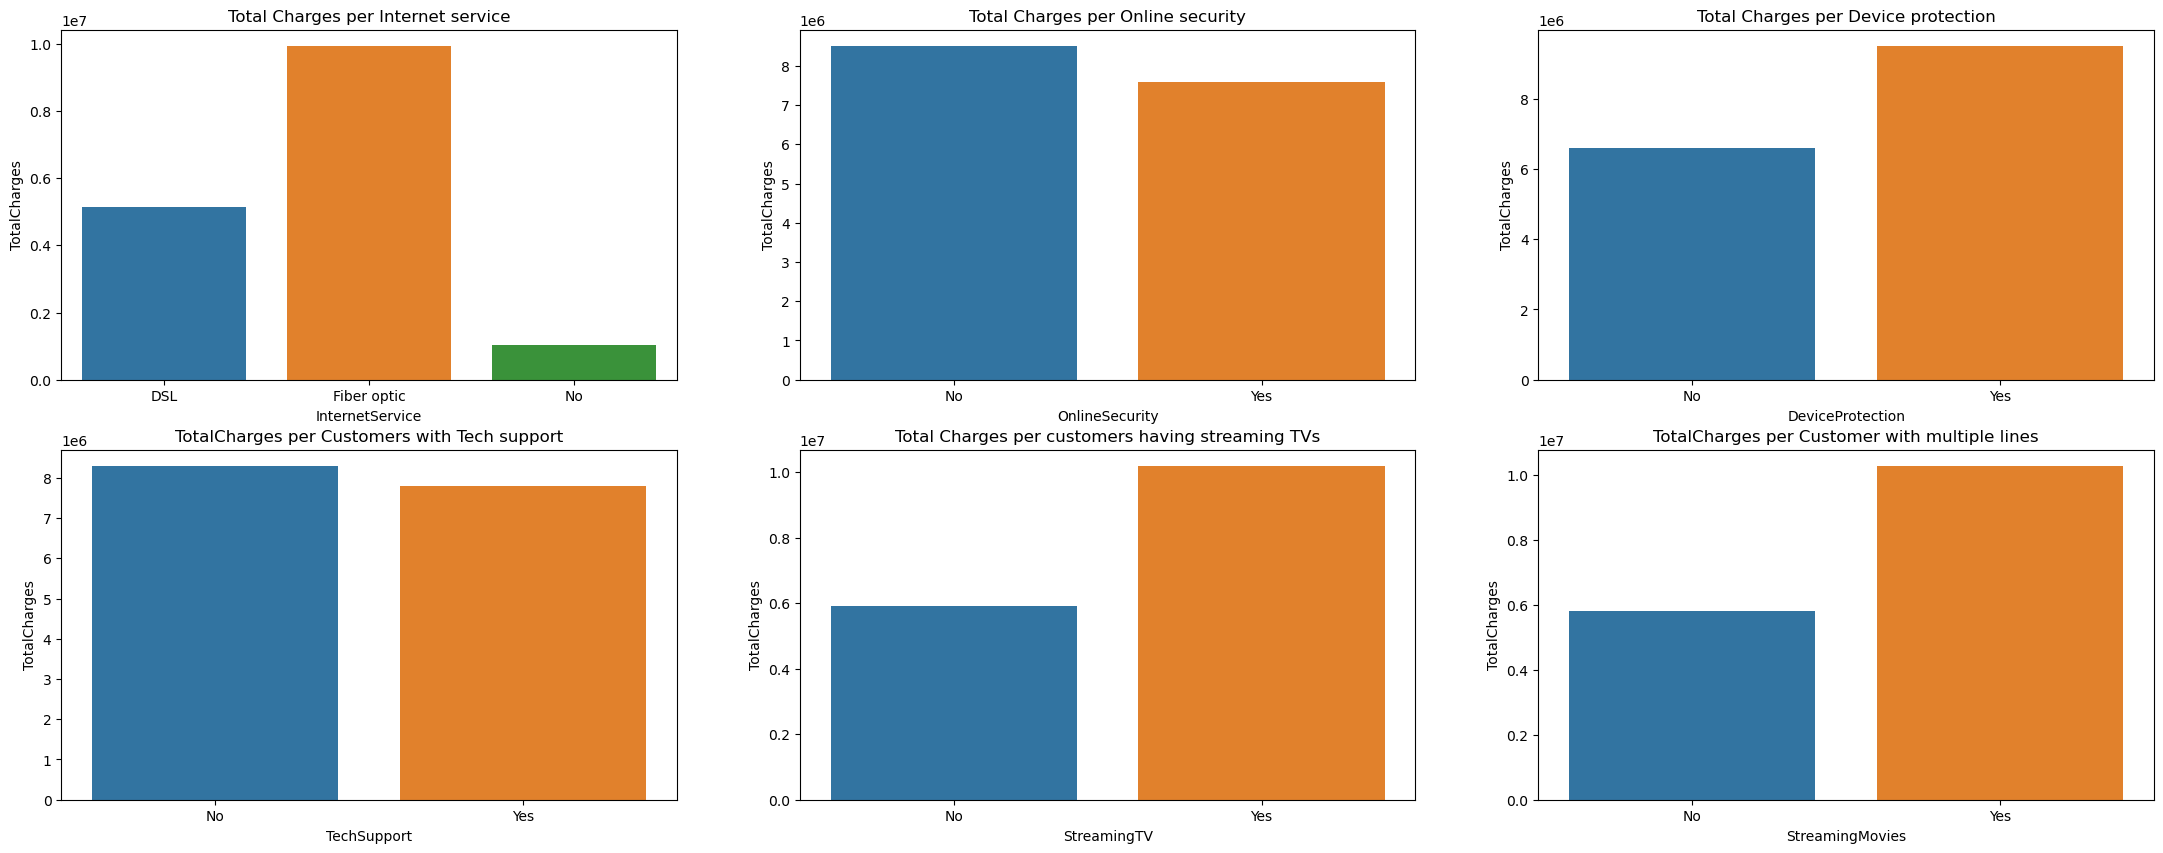

In [103]:
fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

int_mon = df.groupby("InternetService")["TotalCharges"].sum().reset_index()
sns.barplot(x='InternetService', data= int_mon, y= 'TotalCharges', ax=axs[0,0])
axs[0,0].set_title("Total Charges per Internet service")

on_mon = df.groupby("OnlineSecurity")["TotalCharges"].sum().reset_index()
sns.barplot(x='OnlineSecurity', data= on_mon, y= 'TotalCharges', ax=axs[0,1])
axs[0,1].set_title("Total Charges per Online security")

dev_mon = df.groupby("DeviceProtection")["TotalCharges"].sum().reset_index()
sns.barplot(x='DeviceProtection', data= dev_mon, y= 'TotalCharges', ax=axs[0,2])
axs[0,2].set_title("Total Charges per Device protection")

tech_mon = df.groupby("TechSupport")["TotalCharges"].sum().reset_index()
sns.barplot(x='TechSupport', data= tech_mon, y= 'TotalCharges', ax=axs[1,0])
axs[1,0].set_title("TotalCharges per Customers with Tech support")


st_mon = df.groupby("StreamingTV")["TotalCharges"].sum().reset_index()
sns.barplot(x='StreamingTV', data=st_mon , y= 'TotalCharges', ax=axs[1,1])
axs[1,1].set_title("Total Charges per customers having streaming TVs")


sm_mon = df.groupby("StreamingMovies")["TotalCharges"].sum().reset_index()
sns.barplot(x='StreamingMovies', data= sm_mon, y= 'TotalCharges', ax=axs[1,2])
axs[1,2].set_title("TotalCharges per Customer with multiple lines");

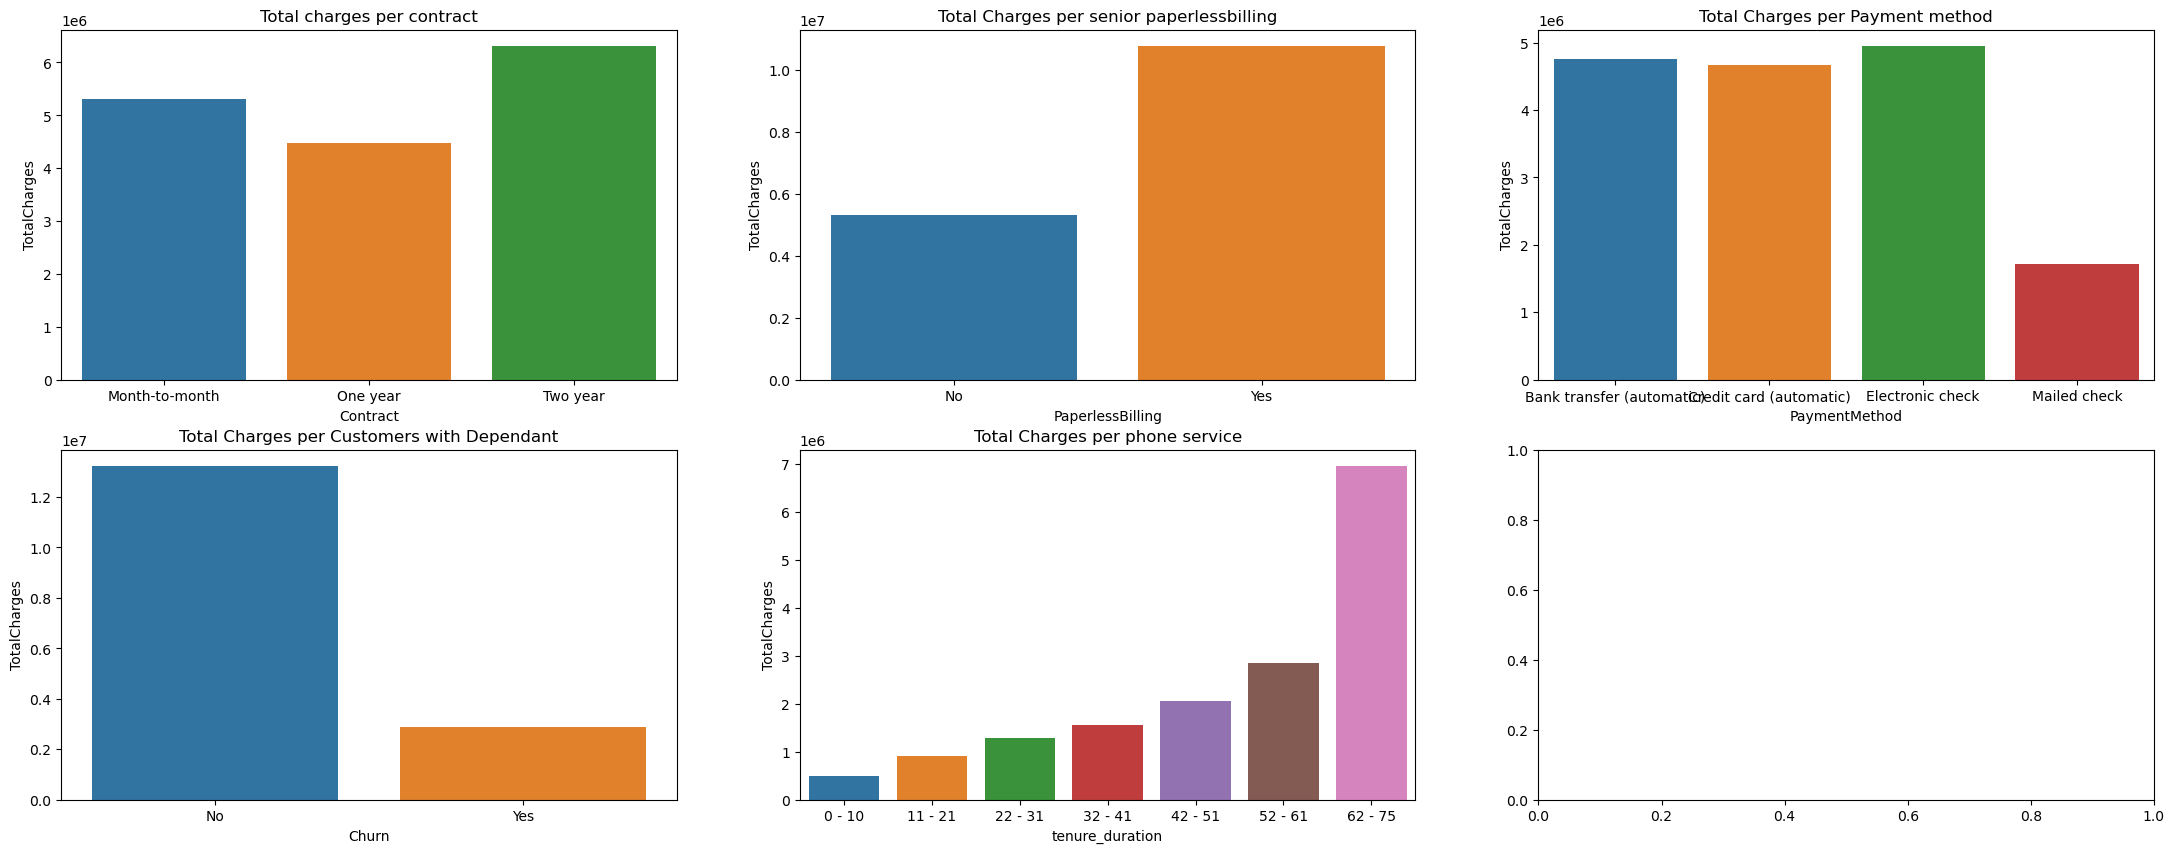

In [104]:
fig,axs= plt.subplots(nrows=2, ncols=3, figsize=(27,10))

con_mon = df.groupby("Contract")["TotalCharges"].sum().reset_index()
sns.barplot(x='Contract', data= con_mon, y= 'TotalCharges', ax=axs[0,0])
axs[0,0].set_title("Total charges per contract")

pap_mon = df.groupby("PaperlessBilling")["TotalCharges"].sum().reset_index()
sns.barplot(x='PaperlessBilling', data= pap_mon, y= 'TotalCharges', ax=axs[0,1])
axs[0,1].set_title("Total Charges per senior paperlessbilling")

pay_mon = df.groupby("PaymentMethod")["TotalCharges"].sum().reset_index()
sns.barplot(x='PaymentMethod', data= pay_mon, y= 'TotalCharges', ax=axs[0,2])
axs[0,2].set_title("Total Charges per Payment method")

churn_mon = df.groupby("Churn")["TotalCharges"].sum().reset_index()
sns.barplot(x='Churn', data= churn_mon, y= 'TotalCharges', ax=axs[1,0])
axs[1,0].set_title("Total Charges per Customers with Dependant")


ten_mon = df.groupby("tenure_duration")["TotalCharges"].sum().reset_index()
sns.barplot(x='tenure_duration', data=ten_mon , y= 'TotalCharges', ax=axs[1,1])
axs[1,1].set_title("Total Charges per phone service");

<Axes: xlabel='Churn', ylabel='TotalCharges'>

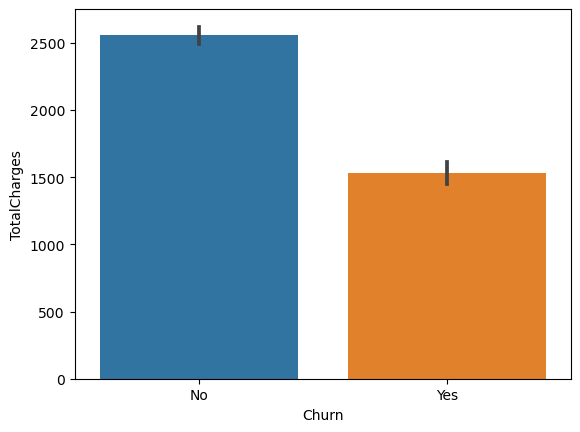

In [105]:
 sns.barplot (x='Churn', data= df, y= 'TotalCharges')

Revenue generated by Customers who has churned is more than half of the total revenue of those who has not cancelled services

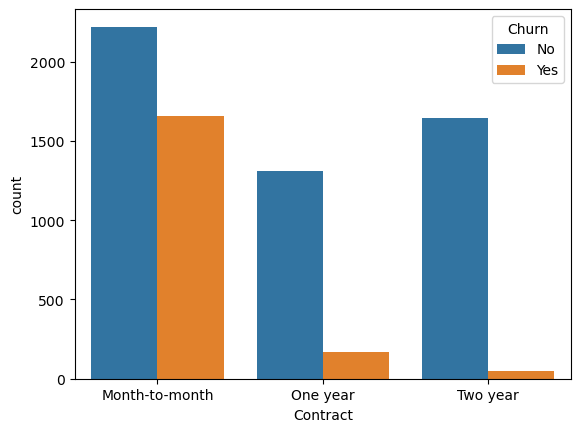

In [106]:
 sns.countplot (x='Contract', data= df, hue= 'Churn');

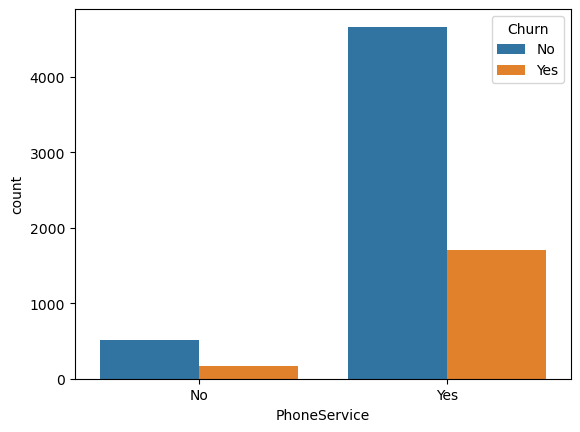

In [107]:
 sns.countplot (x='PhoneService', data= df, hue= 'Churn');

Customers who has no phone service and hasn't churn is bit higher than those who has cancelled service

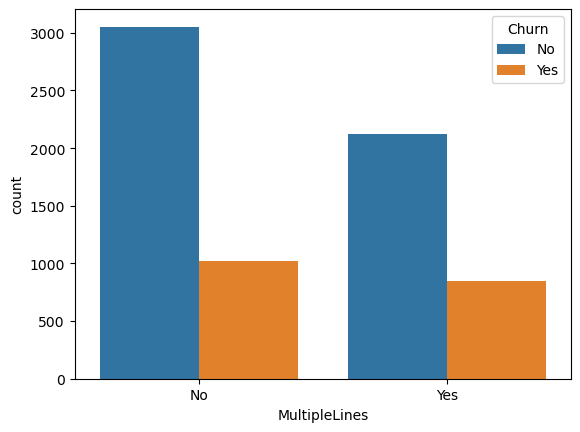

In [108]:
 sns.countplot (x='MultipleLines', data= df, hue= 'Churn');

Proportion of customers without multiple lines has churn compare to those with Multiple lines

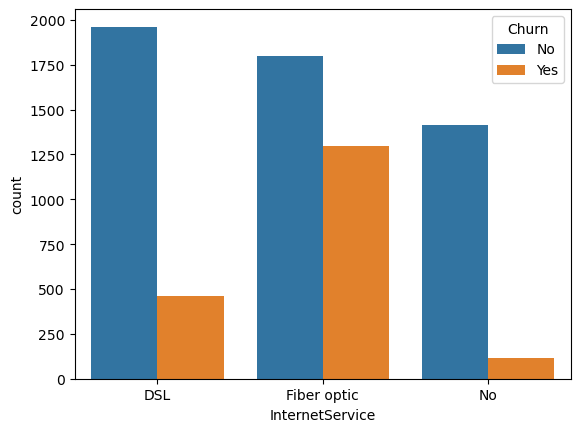

In [109]:
 sns.countplot (x='InternetService', data= df, hue= 'Churn');

<Axes: xlabel='Partner', ylabel='TotalCharges'>

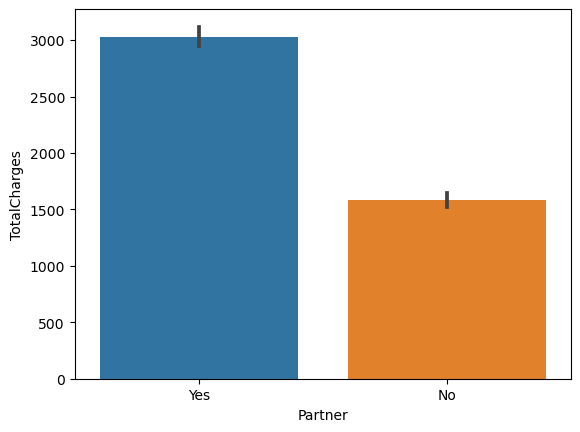

In [110]:
 sns.barplot (x='Partner', data= df, y= 'TotalCharges')

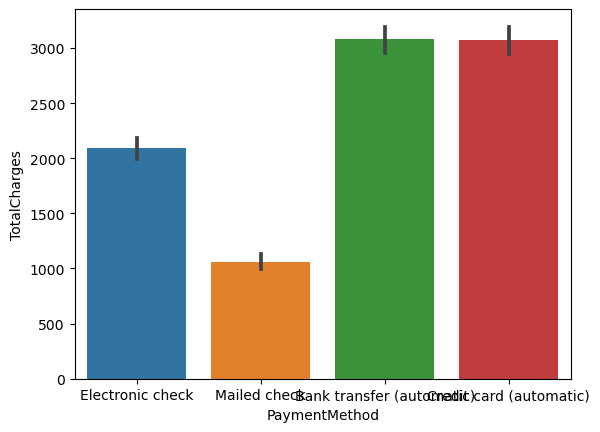

In [111]:
 sns.barplot (x='PaymentMethod', data= df, y= 'TotalCharges');

<Axes: xlabel='Contract', ylabel='TotalCharges'>

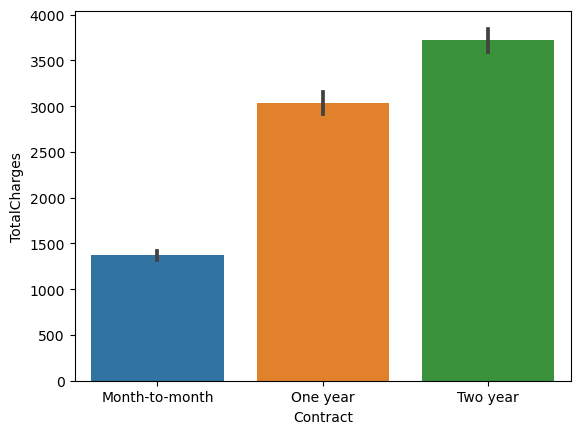

In [112]:
sns.barplot (x='Contract', data= df, y= 'TotalCharges')

<Axes: xlabel='MultipleLines', ylabel='TotalCharges'>

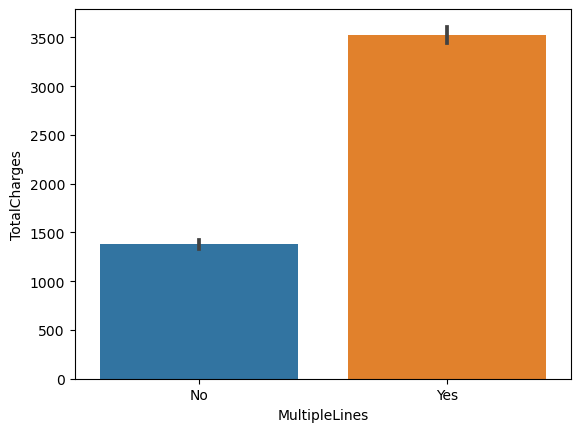

In [113]:
sns.barplot (x='MultipleLines', data= df, y= 'TotalCharges')

The company has generated more revenue from customer with multiple lines compare to those without multiple lines

In [114]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_duration'],
      dtype='object')

### Multivariate Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_28712\703304077.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

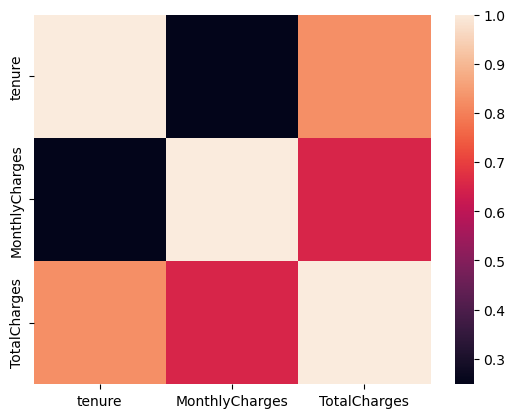

In [115]:
#correlation
sns.heatmap(df.corr())

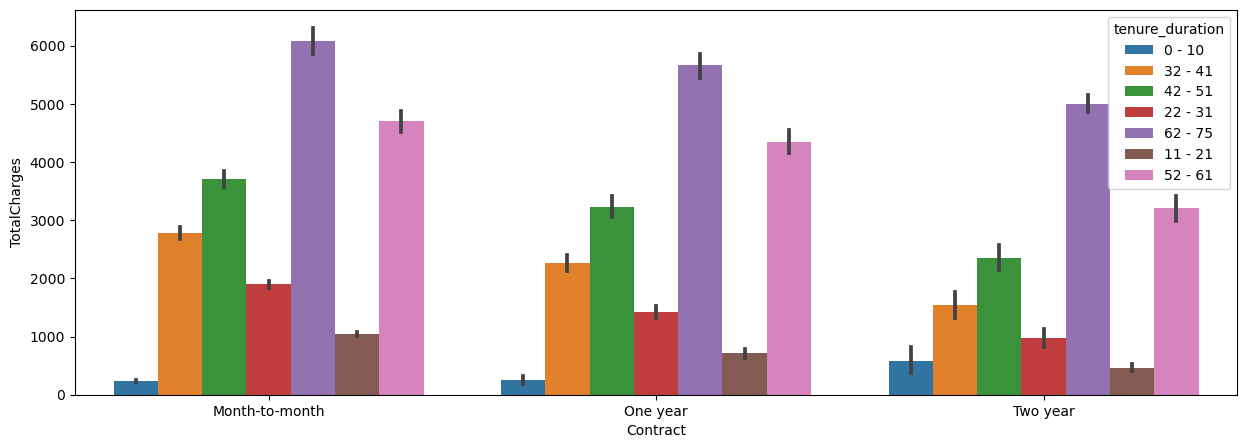

In [116]:
plt.figure(figsize=(15,5))
sns.barplot(x="Contract", y='TotalCharges', data=df, hue="tenure_duration");

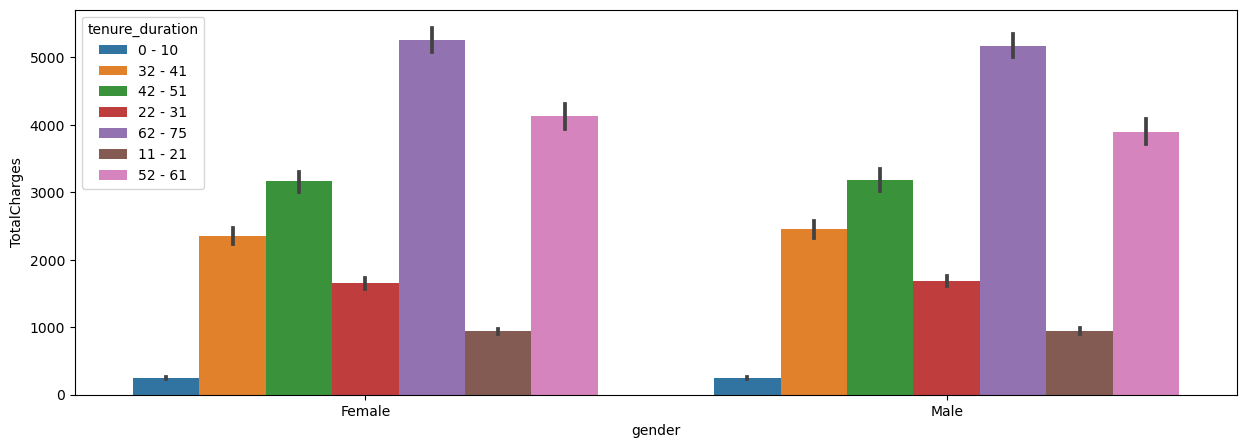

In [117]:
plt.figure(figsize=(15,5))
sns.barplot(x="gender", y='TotalCharges', data=df, hue="tenure_duration");

both male and female gender that generated highest revenue fall between the tenure duration (62-75)

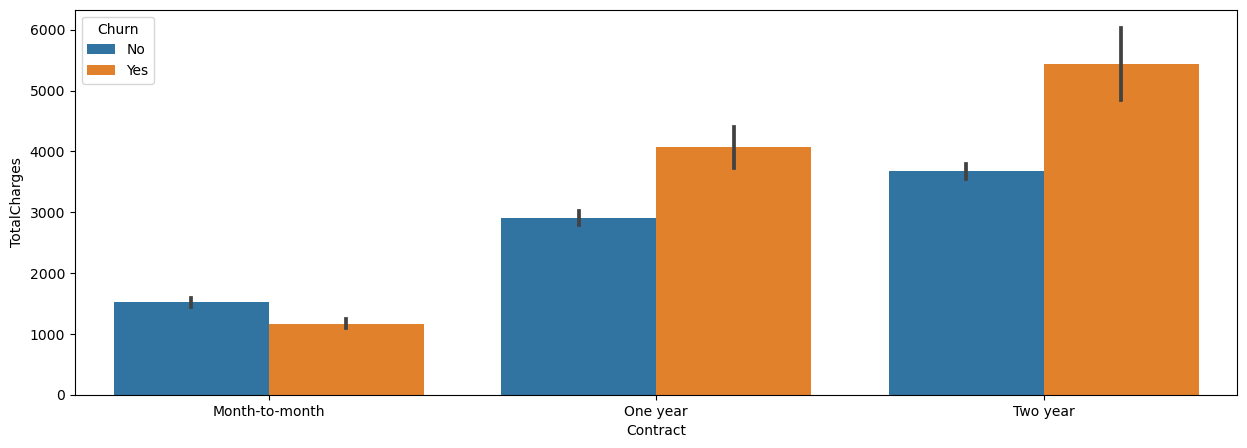

In [118]:
plt.figure(figsize=(15,5))
sns.barplot(x="Contract", y='TotalCharges', data=df, hue="Churn");

- Customers who signed two year contract with the company generated more revenue, unfortunately more than then third quarter of them has churn
- also for those that sign a year contract, the proportion of those thas churn and generate more revenue is higher to those who hasn't cancelled
- month-to-month contract customers who hasn't churn is higher compare to those who has churn

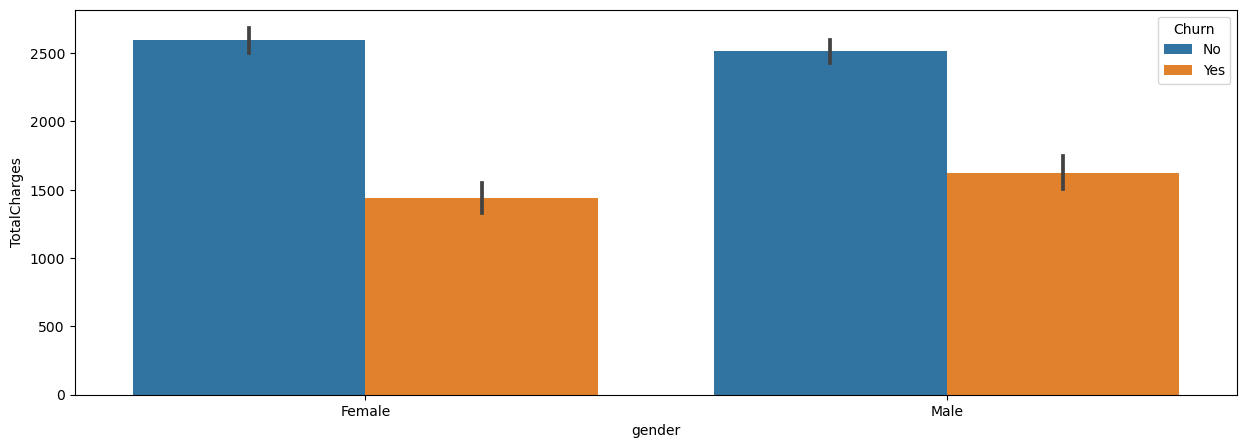

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(x="gender", y='TotalCharges', data=df, hue="Churn");

Female who hasn't cancell service with the company generated more revenue than their male counterpart while for those who have churn the male gender generated more revenue compare to the female

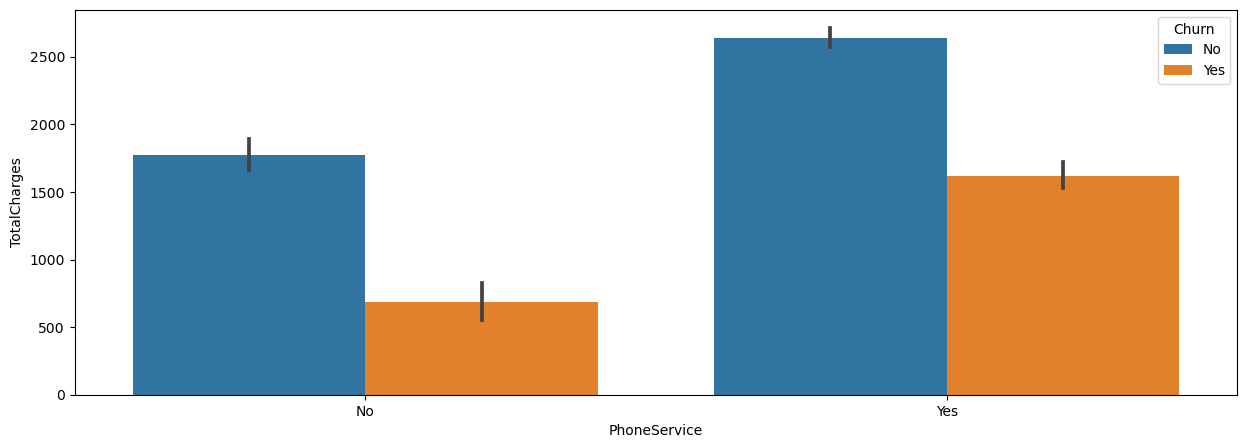

In [120]:
plt.figure(figsize=(15,5))
sns.barplot(x="PhoneService", y='TotalCharges', data=df, hue="Churn");

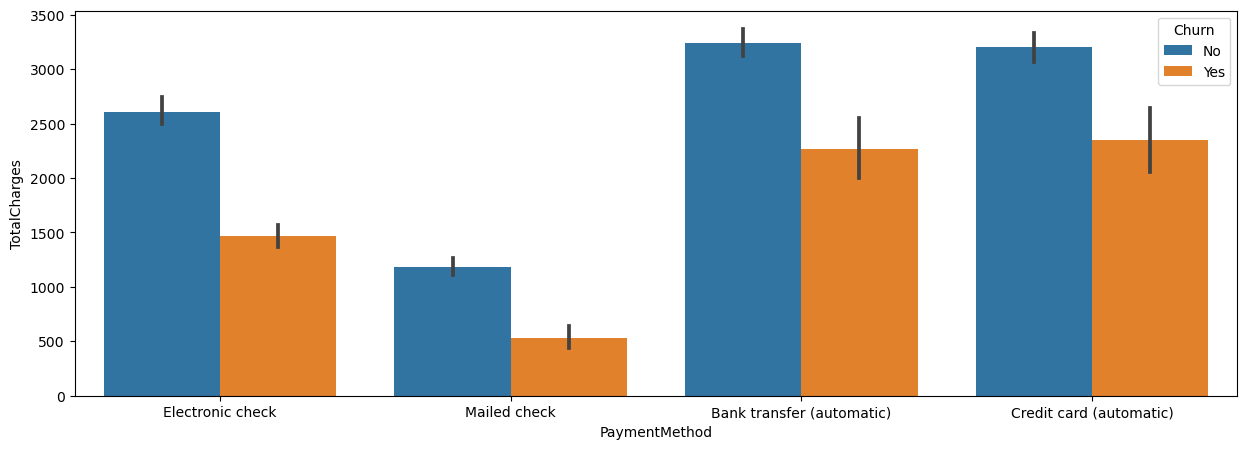

In [121]:
plt.figure(figsize=(15,5))
sns.barplot(x="PaymentMethod", y='TotalCharges', data=df, hue="Churn");

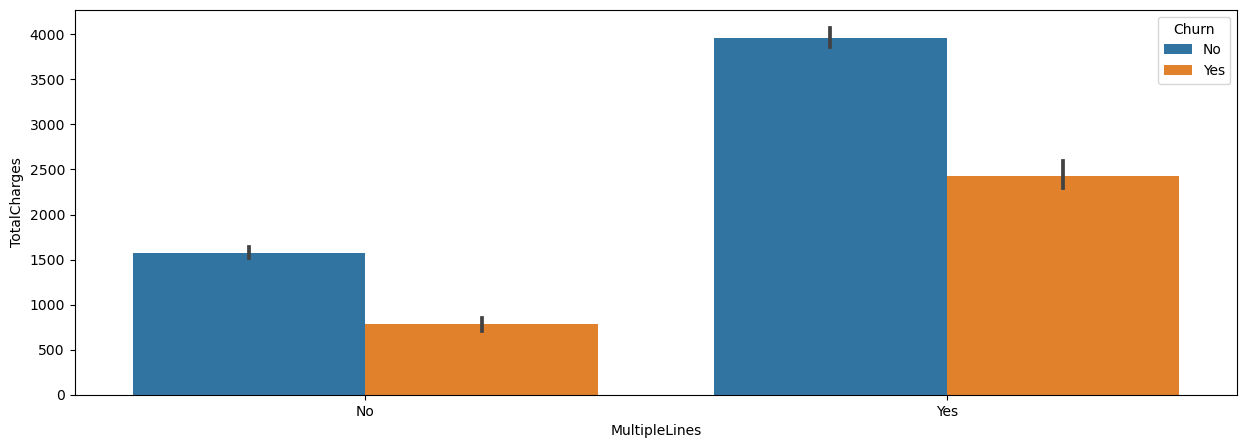

In [122]:
plt.figure(figsize=(15,5))
sns.barplot(x="MultipleLines", y='TotalCharges', data=df, hue="Churn");

Customers have multiple lines generating more revenue has churn more when compare with those without multiple lines

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


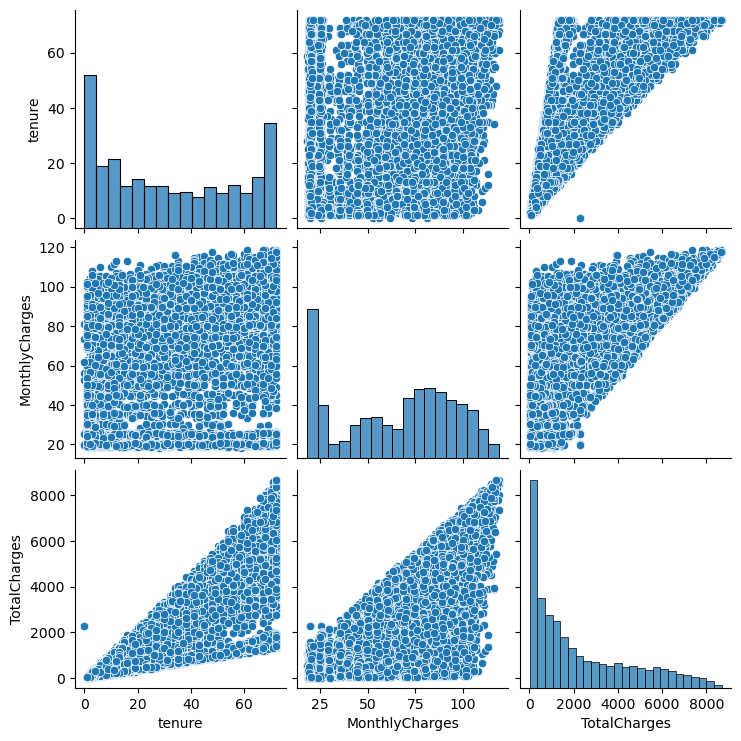

In [123]:
sns.pairplot(df, size=2.5);

### Feature Engineering/ Data pre-processing

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0 - 10
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,32 - 41
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0 - 10
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,42 - 51
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0 - 10


In [126]:
#  Label Encoding
encoder = LabelEncoder()    # method initialization

# Looping for columns
for c in df.columns[0:]:
    if (df[c].dtype=='object'):
        df[c] = encoder.fit_transform(df[c])
    else:
        df[c] = df[c]

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration
0,5375,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,2,29.85,29.85,0,0
1,3962,1,0,0,0,34,1,0,0,1,...,0,0,0,1,0,3,56.95,1889.50,0,3
2,2564,1,0,0,0,2,1,0,0,1,...,0,0,0,0,1,3,53.85,108.15,1,0
3,5535,1,0,0,0,45,0,0,0,1,...,1,0,0,1,0,0,42.30,1840.75,0,4
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,0


def ch(x):
    if x == "No":
        return 0
    else:
        return 1
df["Churn"] = df['Churn'].apply(ch)

In [127]:
# create a copy of the data (Exclude churn/label)

df1= df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
        
label = df[['Churn']]

In [128]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [129]:
label.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [130]:
# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

####  Machine learning

In [131]:
# Split the dataset into training and testing sets - X = Questions, Y = Answers

x_train, x_test, y_train, y_test  = train_test_split(df1, label, test_size=0.2, random_state=42)

In [132]:
x_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,3,64.85,1336.800000
1623,0,0,0,0,1,1,1,0,1,0,0,1,1,2,1,0,97.20,5129.450000
6074,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,23.45,23.450000
1362,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.950000
6754,1,0,0,1,1,1,0,1,1,0,1,0,0,2,1,0,61.90,2283.300441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,0,1,1,0,0,0,1,1,0,1,2,95.00,95.000000
5191,0,0,1,1,1,1,0,1,1,1,1,1,1,2,1,1,91.10,2198.300000
5226,1,0,1,1,1,0,2,0,0,0,0,0,0,0,1,2,21.15,306.050000
5390,1,1,0,0,1,1,1,0,0,1,0,1,1,0,1,2,99.45,1200.150000


In [133]:
x_test

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,24.80,24.80
2715,1,0,0,0,1,1,2,0,0,0,0,0,0,0,1,0,25.25,996.45
3825,0,0,1,1,1,0,2,0,0,0,0,0,0,2,0,3,19.35,1031.70
1807,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2,76.35,76.35
132,1,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,1,0,0,0,1,1,1,0,1,2,1,3,68.30,4378.80
315,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,110.05,5686.40
2439,1,0,1,1,1,0,2,0,0,0,0,0,0,1,0,0,19.90,329.75
5002,0,0,1,1,0,0,0,1,0,1,0,0,1,2,1,1,43.95,2960.10


In [134]:
y_train

,Churn
2142,0
1623,0
6074,1
1362,1
6754,0
...,...
3772,1
5191,0
5226,0
5390,1


In [135]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


In [136]:
# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [137]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8105039034776437
Precision: 0.6687898089171974
Recall: 0.5630026809651475
F1-score: 0.6113537117903931
AUC-ROC: 0.7313082902895235


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### For Logistics Regression
- Accuracy is 81%
- Precision is 67%

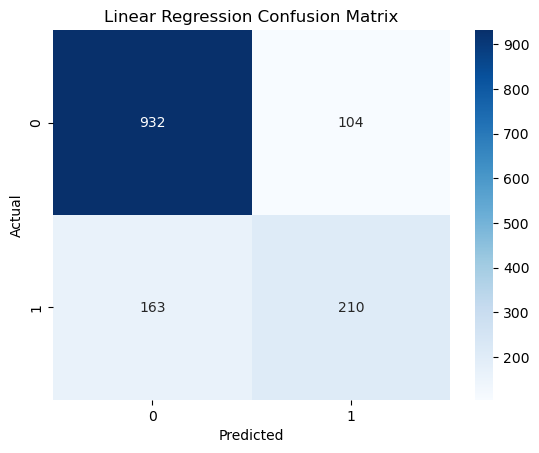

In [156]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Linear Regression Confusion Matrix")
plt.show()

- True Postive (TP) is 932
- True Negative (TN) is 104
- False Positive (FP) = 163
- False Negative (FN) = 210

Out the total numbers of 1409 persons presented this model test to predict their churn status, 932 persons were postively predicted not to have cancelled their service with the company it resulted to be true, 104 persons were negatively predicted not churn, 163 persons were negatively predicted to have cancelled service but it resulted to be false and 210 persons predicted to have churned it resulted to be true

In summary, the model tends to predict 1142 correctly out of 1409

In [157]:
# Model Building
# Random Forest Classifier

rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC", roc_auc_score(y_test, rfy_pred))

C:\Users\USER\AppData\Local\Temp\ipykernel_28712\1508615150.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Random Forest
Accuracy: 0.7899219304471257
Precision: 0.6441947565543071
Recall: 0.46112600536193027
F1-score: 0.5374999999999999
AUC-ROC 0.6847135818315443


#####  For Forest Classifier
- Accuracy is 79%
- Precision is 65%

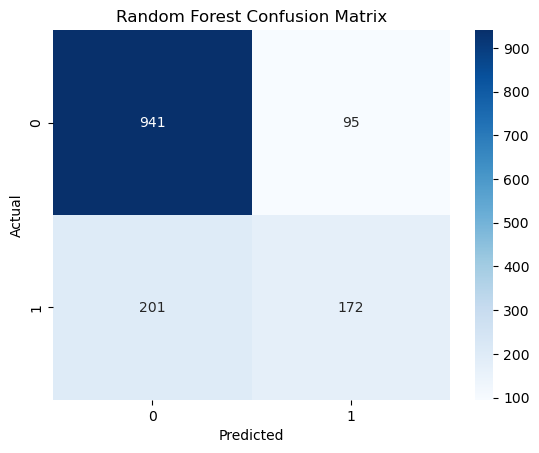

In [158]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

- True Postive (TP) is 941
- True Negative (TN) is 95
- False Positive (FP) is 201
- False Negative (FN) is 172

Out the total numbers of 1409 persons presented this model test to predict their churn status, 941 persons were postively predicted not to have cancelled their service with the company it resulted to be true, 95 persons were negatively predicted not churn, 201 persons were negatively predicted to have cancelled service but it resulted to be false and 172 persons predicted to have churned it resulted to be true

In summary, the model tends to predict 1113 correctly out of 1409

In [141]:
# 8 Machine Learning Algorithm will be applied to the dataset

classifiers = [[XGBClassifier(),'XGB Classifier'],
              [RandomForestClassifier(),'Random Forest'],
              [KNeighborsClassifier(),'K-Nearest Neighbors'],
              [SGDClassifier(),'SGD Classifier'],
              [SVC(),'SVC'],
              [GaussianNB(), "Naive Bayes"],
              [DecisionTreeClassifier(random_state = 42), "Decision tree"],
              [LogisticRegression(),'Logistic Regression'],
              ]

In [142]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassif

In [143]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100,2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100,2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + '%'])

    
    
    if model_name != classifiers[-1][1]:
        print('')

C:\Users\USER\AppData\Local\Temp\ipykernel_28712\2798011560.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
acc_list

{'XGB Classifier': ['79.77%'],
 'Random Forest': ['79.77%'],
 'K-Nearest Neighbors': ['77.86%'],
 'SGD Classifier': ['77.29%'],
 'SVC': ['73.53%'],
 'Naive Bayes': ['76.93%'],
 'Decision tree': ['72.53%'],
 'Logistic Regression': ['81.05%']}

In [145]:
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,79.77%,79.77%,77.86%,77.29%,73.53%,76.93%,72.53%,81.05%


In [146]:
print("Precision Score")
sl = pd.DataFrame(precision_list)
sl.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,65.49%,66.42%,60.07%,73.45%,0.0%,54.8%,48.03%,66.88%


In [147]:
print("Recall Score")
sl = pd.DataFrame(acc_list)
sl.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,79.77%,79.77%,77.86%,77.29%,73.53%,76.93%,72.53%,81.05%


In [148]:
print("ROC Score")
sl = pd.DataFrame(roc_list)
sl.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,70.2%,69.52%,68.56%,59.68%,50.0%,75.82%,63.99%,73.13%


#### Narration

- ACCURACY: Logistic Regression and XGB Classifier has the highest percentage of Accurracy score of 81.05 and 79.77 respectively

- PRECISION: Logistic Regression and XGB Classifierhas the highest percentage of Precision score of 66.88 and 65.49 respectively.

- RE-CALL: Logistic Regression and XGB Classifier has the highest percentage of Re- call score of 81.05 and 79.77 respectively

- ROC: Naive Bayes and Logistic Regression has the highest percentage of ROC score of 75.82 and 73.13 respectively


In all the models  Logistic Regression and XGB Classifier to be doing better then followed by Random Forest

In [149]:
# XGB Classifier

xcf = XGBClassifier()
xcf.fit(x_train, y_train)
xcfy_pred = xcf.predict(x_test)
print("XGB classifier")
print("Accuracy:", accuracy_score(y_test, xcfy_pred))
print("Precision:", precision_score(y_test, xcfy_pred))
print("Recall:", recall_score(y_test, xcfy_pred))
print("F1-score:", f1_score(y_test, xcfy_pred))
print("AUC-ROC", roc_auc_score(y_test, xcfy_pred)) 

XGB classifier
Accuracy: 0.7977288857345636
Precision: 0.6549295774647887
Recall: 0.49865951742627346
F1-score: 0.5662100456621004
AUC-ROC 0.7020324614158393


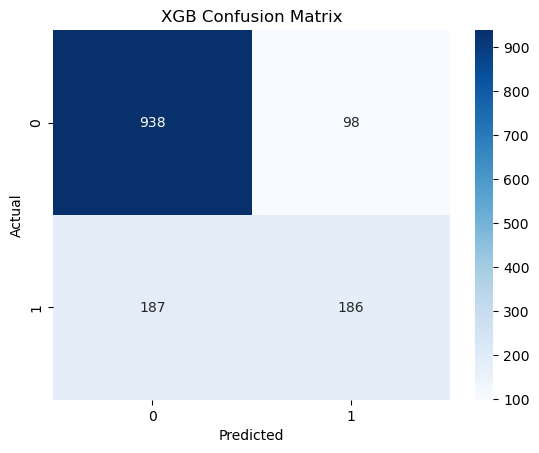

In [150]:
# Create a confusion matrix
xcm = confusion_matrix(y_test, xcfy_pred)

# Visualize the confusion matrix
sns.heatmap(xcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGB Confusion Matrix")
plt.show()

- True Postive (TP) is 938
- True Negative (TN) is 98
- False Positive (FP) is 187
- False Negative (FN) is 186

Out the total numbers of 1409 persons presented to the model test to predict their churn status, 938 persons were postively predicted not to have cancelled their service with the company it resulted to be true, 98 persons were negatively predicted not churn, 187 persons were negatively predicted to have cancelled service but it resulted to be false and 186 persons predicted to have churned it predicted rightly

In summary, the model tends to predict 1310 correctly out of 1409

In [151]:
# KNeighboors Classifier

kcf = KNeighborsClassifier()
kcf.fit(x_train, y_train)
kcfy_pred = kcf.predict(x_test)
print("XGB classifier")
print("Accuracy:", accuracy_score(y_test, kcfy_pred))
print("Precision:", precision_score(y_test, kcfy_pred))
print("Recall:", recall_score(y_test, kcfy_pred))
print("F1-score:", f1_score(y_test, kcfy_pred))
print("AUC-ROC", roc_auc_score(y_test, kcfy_pred))     

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


XGB classifier
Accuracy: 0.7785663591199432
Precision: 0.6006600660066007
Recall: 0.4879356568364611
F1-score: 0.5384615384615385
AUC-ROC 0.685570145020547


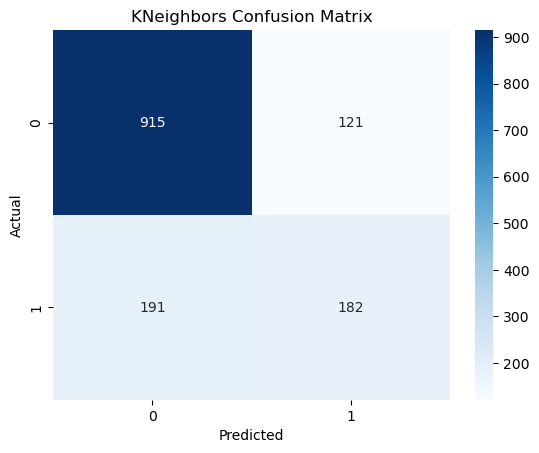

In [152]:
# Create a confusion matrix
kcm = confusion_matrix(y_test, kcfy_pred)

# Visualize the confusion matrix
sns.heatmap(kcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNeighbors Confusion Matrix")
plt.show()

- True Postive (TP) is 915
- True Negative (TN) is 121
- False Positive (FP) is 191
- False Negative (FN) is 182

Out the total numbers of 1409 persons presented to the model to predict their churn status, 915 persons were postively predicted not to have cancelled their service with the company it resulted to be true, 121 persons were negatively predicted not churn, 191 persons were negatively predicted to have cancelled service but it resulted to be false and 182 persons predicted to have churned it predicted rightly

In summary, the model tends to predict 1097 correctly out of 1409

In [153]:
# GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nby_pred = nb.predict(x_test)
print("Naive Baye")
print("Accuracy:", accuracy_score(y_test, nby_pred))
print("Precision:", precision_score(y_test, nby_pred))
print("Recall:", recall_score(y_test, nby_pred))
print("F1-score:", f1_score(y_test, nby_pred))
print("AUC-ROC", roc_auc_score(y_test, nby_pred))

Naive Baye
Accuracy: 0.7693399574166075
Precision: 0.548
Recall: 0.7345844504021448
F1-score: 0.6277205040091638
AUC-ROC 0.7582188661277133


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


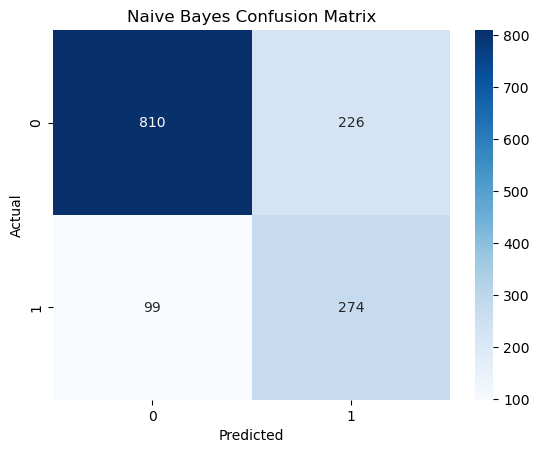

In [155]:
# Create a confusion matrix
ncm = confusion_matrix(y_test, nby_pred)

# Visualize the confusion matrix
sns.heatmap(ncm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


- True Postive (TP) is 810
- True Negative (TN) is 226
- False Positive (FP) is 99
- False Negative (FN) is 274

Out the total numbers of 1409 persons presented to the model to predict their churn status, 915 persons were postively predicted not to have cancelled their service with the company it resulted to be true, 121 persons were negatively predicted not churn, 191 persons were negatively predicted to have cancelled service but it resulted to be false and 182 persons predicted to have churned it predicted rightly

In summary, the model tends to predict 1084 correctly out of 1409
